# 项目：预定酒店场景下的用户行为预测 

# 一、项目介绍
## 背景
* 你们可能想知道，当一位酒店经理接到一个提前一个月预定的酒店订单，这位经理是如何判断这位用户之后取消预约的概率。为了解答这个问题，本项目收集了来自kaggle的酒店预定需求数据集，尝试分析会导致用户取消预约的因素，并且寻找一些能使我们能够预测用户是否会取消预定的方法。这个项目涵盖了数据清洗，数据探索性分析，特征工程，建模预测以及AB test。
* 这个项目的目标变量为‘is_canceled’，其取值分别为 ‘1’（取消预约）和 '0'（不会取消预约）
* 虽然这个数据集是采集自kaggle，但根据kaggle的说明，其最初出处是Nuno Antonio等人发表的论文[1] (Hotel Booking Demand, Nuno Antonio et.al 2019)，有兴趣的读者请自行搜索此论文。

# 二、加载数据集

* 我们需要引用项目需要用到的包并读取数据

In [1]:
library(tidyverse) 
 
library(naniar) #handle missing values 

library(caret)# handle categorical variables 

library(mlr)# build machine learning model 

library(lubridate)  # extraction of a date-time onject

library(FSelector)# feature selection

library(ggcorrplot) # corr matrix

#install.packages('infotheo')
library('infotheo') # 分箱操作

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.0     √ purrr   0.3.4
√ tibble  3.0.1     √ dplyr   0.8.5
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: ParamHelpers

'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).


Attaching package: 'mlr'


The following object is masked from 'package:caret':

    train



Attaching package: 'lubridate'


The following objects are masked from 'package:dplyr':

    intersect, setdiff, union


The following objects are masked from 'package:base':

    date, intersect, setdiff, union

In [2]:
data <- read_csv('data.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  hotel = col_character(),
  arrival_date_month = col_character(),
  meal = col_character(),
  country = col_character(),
  market_segment = col_character(),
  distribution_channel = col_character(),
  reserved_room_type = col_character(),
  assigned_room_type = col_character(),
  deposit_type = col_character(),
  customer_type = col_character(),
  reservation_status = col_character(),
  reservation_status_date = col_character()
)

See spec(...) for full column specifications.



In [3]:
glimpse(data)

Rows: 119,390
Columns: 32
$ hotel                          <chr> "City Hotel", "City Hotel", "Resort ...
$ is_canceled                    <dbl> 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, ...
$ lead_time                      <dbl> 35, 0, 1, 81, 378, 59, 31, 104, 26, ...
$ arrival_date_year              <dbl> 2016, 2017, 2015, 2016, 2017, 2017, ...
$ arrival_date_month             <chr> "March", "May", "July", "December", ...
$ arrival_date_week_number       <dbl> 13, 19, 29, 53, 31, 33, 31, 33, 31, ...
$ arrival_date_day_of_month      <dbl> 25, 9, 15, 31, 1, 13, 1, 17, 31, 9, ...
$ stays_in_weekend_nights        <dbl> 0, 0, 0, 1, 4, 2, 2, 2, 3, 2, 0, 1, ...
$ stays_in_week_nights           <dbl> 1, 1, 1, 1, 10, 4, 6, 3, 5, 8, 3, 2,...
$ adults                         <dbl> 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, ...
$ children                       <dbl> 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, ...
$ babies                         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ meal                    

# 三、数据清洗
我们需要先对数据集存在的缺失值，异常值进行清洗，从而避免噪声数据对后续建模产生影响
### 1、缺失值检测

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
company,112593,94.306893375
agent,16340,13.686238378
country,488,0.408744451
children,4,0.003350364
hotel,0,0.000000000
is_canceled,0,0.000000000
lead_time,0,0.000000000
arrival_date_year,0,0.000000000
arrival_date_month,0,0.000000000


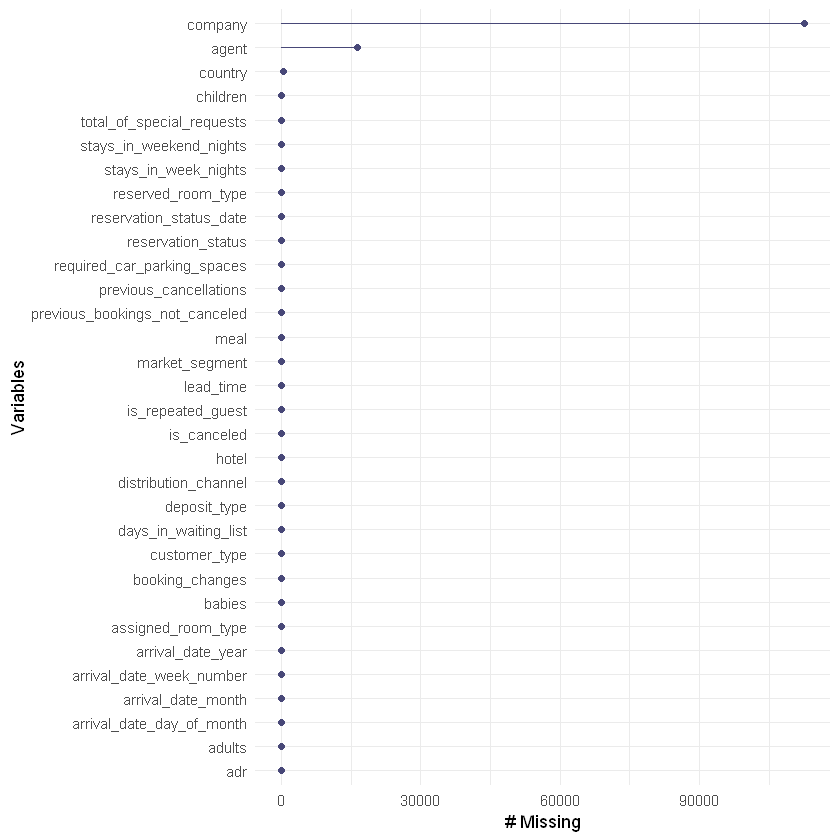

In [4]:
### provide a summary for each variable of the number, 
#percent missings, and sum of missings values 
miss_var_summary(data)   #naniar package
#draws a ggplot of the number of missings in each variable, 
#ordered to show which variables have the most missing data
gg_miss_var(data)   #naniar package

In [5]:
#drop column `company` 
data <- data %>% select(-company)

In [6]:
#drop rows with missing values  and  delete `company`
data <- data %>% drop_na()

In [7]:
#check again, there is no missing value
miss_var_summary(data)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
hotel,0,0
is_canceled,0,0
lead_time,0,0
arrival_date_year,0,0
arrival_date_month,0,0
arrival_date_week_number,0,0
arrival_date_day_of_month,0,0
stays_in_weekend_nights,0,0
stays_in_week_nights,0,0


数据一共有36列，有5列存在缺失值情况，最高缺失值的比例高达94.3%，对缺失值的处理，我们的处理方法为：将其所在列删除。
另外，在数据预处理过程中对缺失值的处理方法还有其他方法，如下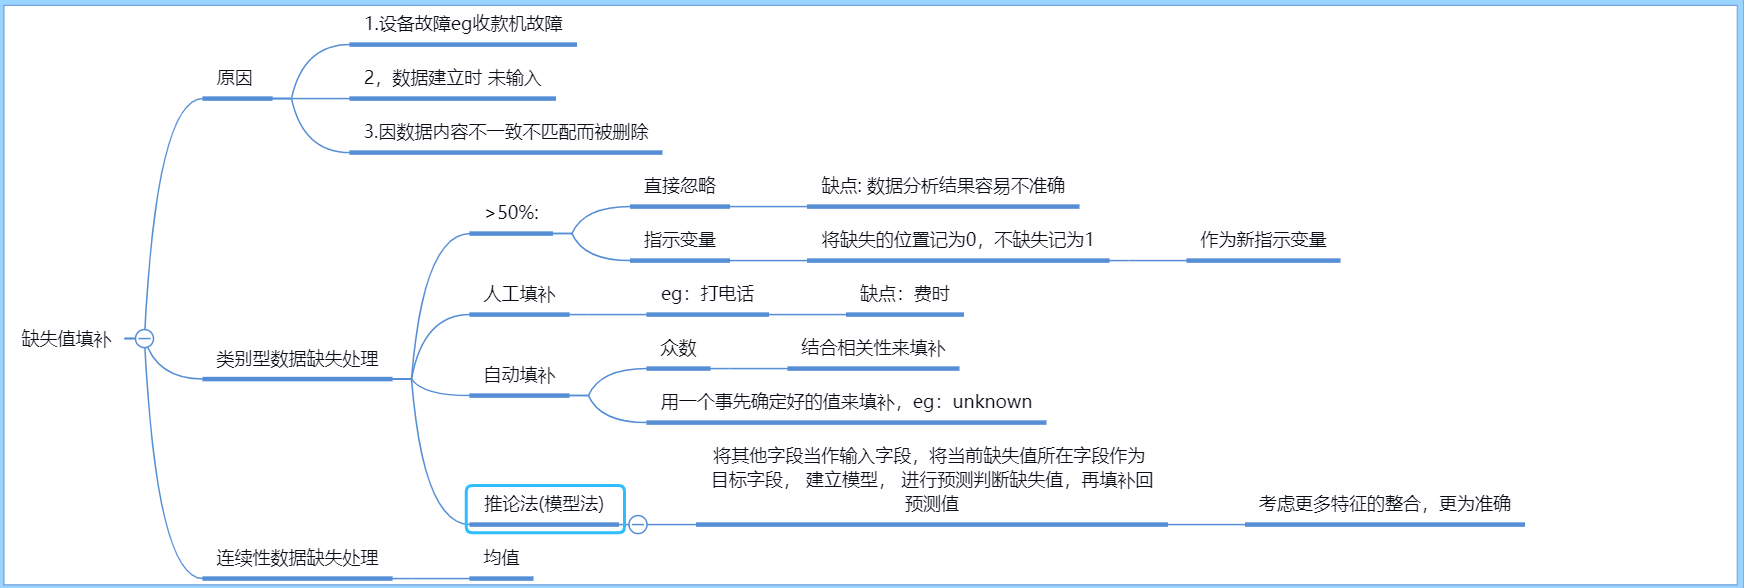

In [8]:
glimpse(data)

Rows: 102,894
Columns: 31
$ hotel                          <chr> "City Hotel", "City Hotel", "Resort ...
$ is_canceled                    <dbl> 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...
$ lead_time                      <dbl> 35, 0, 378, 59, 31, 104, 26, 116, 24...
$ arrival_date_year              <dbl> 2016, 2017, 2017, 2017, 2017, 2017, ...
$ arrival_date_month             <chr> "March", "May", "August", "August", ...
$ arrival_date_week_number       <dbl> 13, 19, 31, 33, 31, 33, 31, 32, 33, ...
$ arrival_date_day_of_month      <dbl> 25, 9, 1, 13, 1, 17, 31, 9, 17, 14, ...
$ stays_in_weekend_nights        <dbl> 0, 0, 4, 2, 2, 2, 3, 2, 0, 1, 1, 1, ...
$ stays_in_week_nights           <dbl> 1, 1, 10, 4, 6, 3, 5, 8, 3, 2, 4, 2,...
$ adults                         <dbl> 2, 1, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, ...
$ children                       <dbl> 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, ...
$ babies                         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ meal                    

### 2、特征工程
#### 在检测异常值之前，可以先对现有特征进行合理构建，转化以及精简
#### 2.1 特征构建
* 从 `reservation_status_date`  分别提取出 年，月并构建新变量`reservation_year`,`reservation_month`  
* 从 `arrival_date_month`  分别提取出 年，月并构建新变量`arrival_date_month`

#### 2.2 特征转化
该步骤旨在 将数值型变量（double）转换为字符型变量（character）以便于分析
* `required_car_parking_spaces` 含义为 用户要求的停车位个数，应该离散型变量，故需将其转化为字符型变量（character）
* 2.1步骤中新建的四个变量均转化为字符型变量（character）均便于后续分析

#### 2.3 特征精简
这一步目的在于删除冗余特征以及无相关变量
* adr:Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying night
该变量指的是 所有成交订单的订单总额与夜晚停留的总次数的比值，我的理解是当用户取消预定时，adr这个变量此时无意义，因此对预测用户是否取消预测无帮助，因此我们将其删除。
* country：该类别型变量指的是用户的来源国，此列有172个不同值，即用户来自172个国家，类别过多，不方便用于建模分析，不作为考虑
* reservation_status：Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
该变量指的是用户预定的最后状态，有“取消预定”，“退房”or“没出现”，这个变量提前泄露个用户是否取消预定酒店订单的信息，因此不能作为自变量使用，应该删除。
* reservation_status_date: 用户预定的最后状态对应的更新时间，上个变量被删除，这个也应该一起删除
* arrival_date_year：过去的年份对于预测未来用户是否取消预定订单没有直接帮助
* arrival_date_week_number，arrival_date_day_of_month 分别指的是 到来日期的所在周数（53个取值）以及到来日期的所在日（31个取值），取值类别过大，不便于建模分析，故不作为考虑

In [9]:
#Extract date value from datetime object
#Delete redundant variables
#adr:Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
#change `required_car_parking_spaces` into categorical data
data_ini <-data%>%
    mutate(arrival_date_month =as.character(
               match(substr(arrival_date_month,1,3),month.abb)),
           arrival_date_year = as.character(
               arrival_date_year),
          required_car_parking_spaces = as.character(required_car_parking_spaces)) %>%
    select(-reservation_status_date,
           -country,
           -reservation_status,
           -adr,
           -arrival_date_week_number,
           -arrival_date_day_of_month,
            -arrival_date_year)

In [10]:
glimpse(data_ini)

Rows: 102,894
Columns: 24
$ hotel                          <chr> "City Hotel", "City Hotel", "Resort ...
$ is_canceled                    <dbl> 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...
$ lead_time                      <dbl> 35, 0, 378, 59, 31, 104, 26, 116, 24...
$ arrival_date_month             <chr> "3", "5", "8", "8", "8", "8", "7", "...
$ stays_in_weekend_nights        <dbl> 0, 0, 4, 2, 2, 2, 3, 2, 0, 1, 1, 1, ...
$ stays_in_week_nights           <dbl> 1, 1, 10, 4, 6, 3, 5, 8, 3, 2, 4, 2,...
$ adults                         <dbl> 2, 1, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, ...
$ children                       <dbl> 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, ...
$ babies                         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ meal                           <chr> "BB", "BB", "BB", "FB", "Undefined",...
$ market_segment                 <chr> "Offline TA/TO", "Offline TA/TO", "O...
$ distribution_channel           <chr> "TA/TO", "TA/TO", "TA/TO", "Direct",...
$ is_repeated_guest       

#### 2.4异常值探索
截至目前，我们已经剔除掉一些无用变量，因此我们可以检验下数据中是否存在一些异常值
首先先对数据进行一样总体的描述统计

Warning message:
"package 'patchwork' was built under R version 4.0.2"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



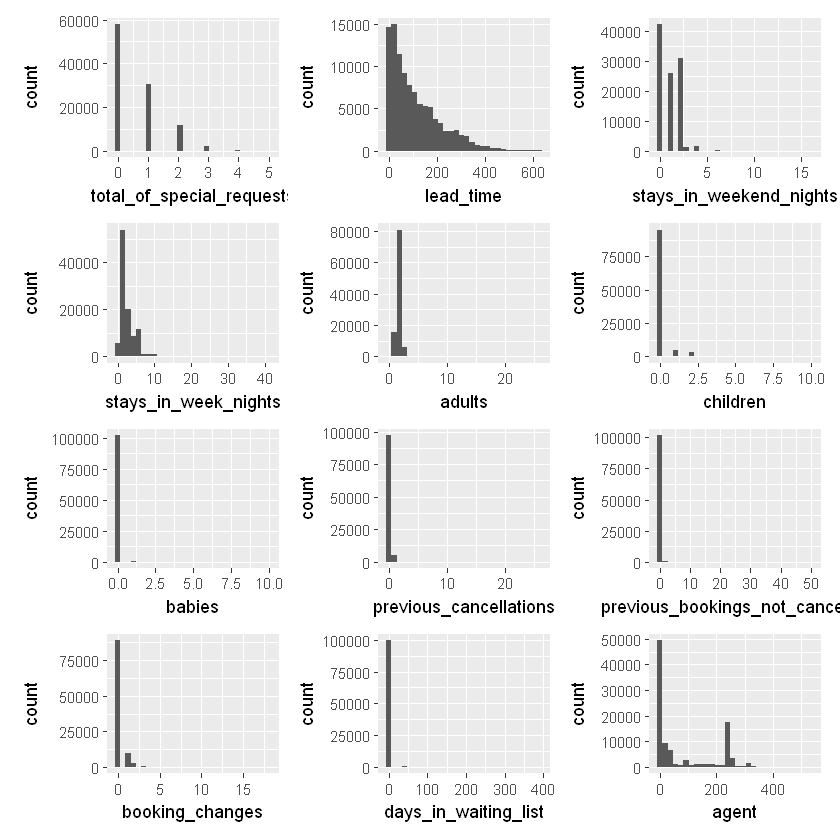

In [11]:
# install.packages('patchwork') #拼图
library(patchwork)
p1 <- data_ini%>%ggplot(aes(x = total_of_special_requests ))+
geom_histogram()
p2 <- data_ini%>%ggplot(aes(x = lead_time))+
geom_histogram()
p3 <- data_ini%>%ggplot(aes(x = stays_in_weekend_nights))+
geom_histogram()
p4 <- data_ini%>%ggplot(aes(x = stays_in_week_nights))+
geom_histogram()
p5 <- data_ini%>%ggplot(aes(x = adults ))+
geom_histogram()
p6 <- data_ini%>%ggplot(aes(x = children))+
geom_histogram()
p7 <- data_ini%>%ggplot(aes(x = babies))+
geom_histogram()
p8 <- data_ini%>%ggplot(aes(x = previous_cancellations))+
geom_histogram()
p9 <- data_ini%>%ggplot(aes(x = previous_bookings_not_canceled))+
geom_histogram()
p10 <- data_ini%>%ggplot(aes(x = booking_changes))+
geom_histogram()
p11 <- data_ini%>%ggplot(aes(x = days_in_waiting_list))+
geom_histogram()
p12 <- data_ini%>%ggplot(aes(x = agent))+
geom_histogram()

p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+plot_layout(ncol=3)

从以上直方图来看，对于以上变量，几乎每个变量都存在离群值，因此我们先观察一下每个变量的描述统计分布 以及使用table函数观察每个变量的取值情况

对于`children`,`babies`,`adults` ，这几个变量指的是 用户预定酒店时所填写要携带小孩子/儿童/婴儿/成年人的数量            
由以下结果，我们可以观察得到 `babies` 取值存在 9 和 10 两个极端值，               
`adults` 取值较多分布在 1和2，因此我们将其他取值归类为 ‘other value’                 
`children` 取值较多分布在1，因此我们将其他取值归类为 ‘1 or more’     
`babies` 取值较多分布在0，因此我们将其他取值归类为 "1 or more"          
这样以上三个变量均变为类别型变量

In [12]:
a <- c('adults','children','babies')
num_data_a <- data_ini[a]
for( i in 1:ncol(num_data_a)){
print(paste('description of',a[i],':'))
print(table(num_data_a[,i]))
print(summary(num_data_a[,i]))}
data_ini<- data_ini%>%mutate(adults = ifelse(adults==1,1,ifelse(adults == 2,2,'other values')),
                        children = ifelse(children ==0,0,"1 or more"),
                        babies = ifelse(babies == 0, 0,"1 or more"))

[1] "description of adults :"

    0     1     2     3     4    26 
  326 15653 81072  5788    50     5 
     adults    
 Min.   : 0.0  
 1st Qu.: 2.0  
 Median : 2.0  
 Mean   : 1.9  
 3rd Qu.: 2.0  
 Max.   :26.0  
[1] "description of children :"

    0     1     2     3    10 
95001  4407  3427    58     1 
    children      
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.1112  
 3rd Qu.: 0.0000  
 Max.   :10.0000  
[1] "description of babies :"

     0      1      2      9     10 
102130    751     11      1      1 
     babies         
 Min.   : 0.000000  
 1st Qu.: 0.000000  
 Median : 0.000000  
 Mean   : 0.007697  
 3rd Qu.: 0.000000  
 Max.   :10.000000  


对于`lead_time`,`stays_in_weekend_nights`,`stays_in_week_nights`,`days_in_waiting_list`,`agent`这几个变量，                 
取值要么非常多，要么都是跟时间相关的，因此看单个取值是多少没有太大意义，            
首先对于 `lead_time`，该变量指的是 到达酒店的日期与预定酒单订单的日期之差，该值取值范围从0到600多，非常多，有序类别型变量，我们则可以考虑将该变量进行分箱离散化操作；                
对于`agent`，该变量指的是 用户通过预定就预定的机构/代理方的ID，该变量取值从0遍布到500多，不过为无序类别型变量，我们可以考虑进行分箱离散化操作；               
对于`stays_in_weekend_nights`,`stays_in_week_nights`，`days_in_waiting_list`这两个跟时间相关的变量，
`stays_in_weekend_nights`指的是 用户预定酒店选择入住的周末日的天数，`stays_in_week_nights`指的是是 用户预定酒店选择入住的工作日的天数，
`days_in_waiting_list` 指的是 用户预订酒店后而在经过酒店确认过程中等待的天数         
取值范围分别为【0，17】 以及 【0，42】以及【1，535】结合样本分布情况，即其样本分布不是很均匀，比较极端，故我们考虑把样本量少的取值类别合并到一起，如有条件做分箱操作，则进行分箱      

In [13]:
b <- c('lead_time','stays_in_weekend_nights','stays_in_week_nights','days_in_waiting_list','agent')
num_data_b <- data_ini[b]
for( i in 1:ncol(num_data_b)){
print(paste('description of',b[i],':'))
print(table(num_data_b[,i]))
print(summary(num_data_b[,i]))}

[1] "description of lead_time :"

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
2845 2318 1424 1279 1228 1101 1057  902  900  809  775  861  906  687  849  708 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 771  765  743  769  645  584  631  577  564  591  579  578  675  619  617  594 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 618  589  774  595  636  630  450  652  573  531  423  459  589  494  456  508 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
 429  436  466  349  410  523  430  523  632  423  386  506  413  491  361  384 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
 365  405  409  409  520  510  316  413  478  360  490  404  340  339  329  343 
  80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
 420  339  379  366  323  330  404  416  431  305  282  325  382  321  319 

* 处理 lead_time  异常值

Warning message:
"position_stack requires non-overlapping x intervals"


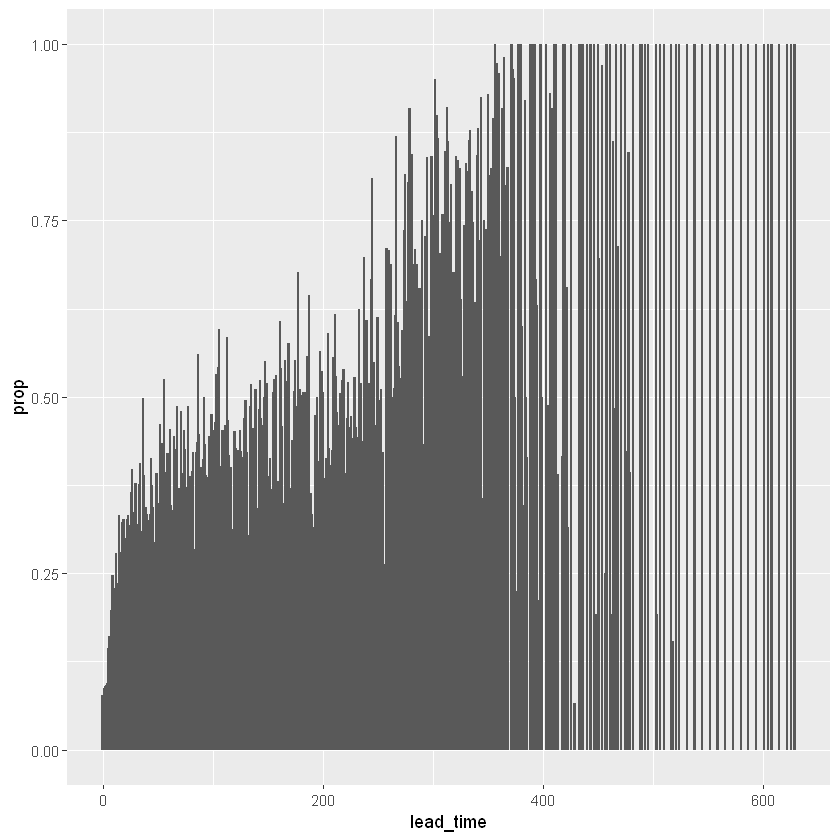

In [14]:
#分箱之前查看 lead_time与酒店预定取消率的关系
#可见两者之间关系不是很明确
data_ini%>%group_by(lead_time)%>%summarise(prop = mean(is_canceled))%>%
ggplot(aes(x = lead_time, y =prop))+
geom_bar(stat='identity',width =2)

equal_freq_lead
    1     2     3     4 
25868 25652 25856 25518 

equal_freq_lead,Freq
<fct>,<int>
1,25868
2,25652
3,25856
4,25518


[1] 26

[1] 79

[1] 169

[1] 629

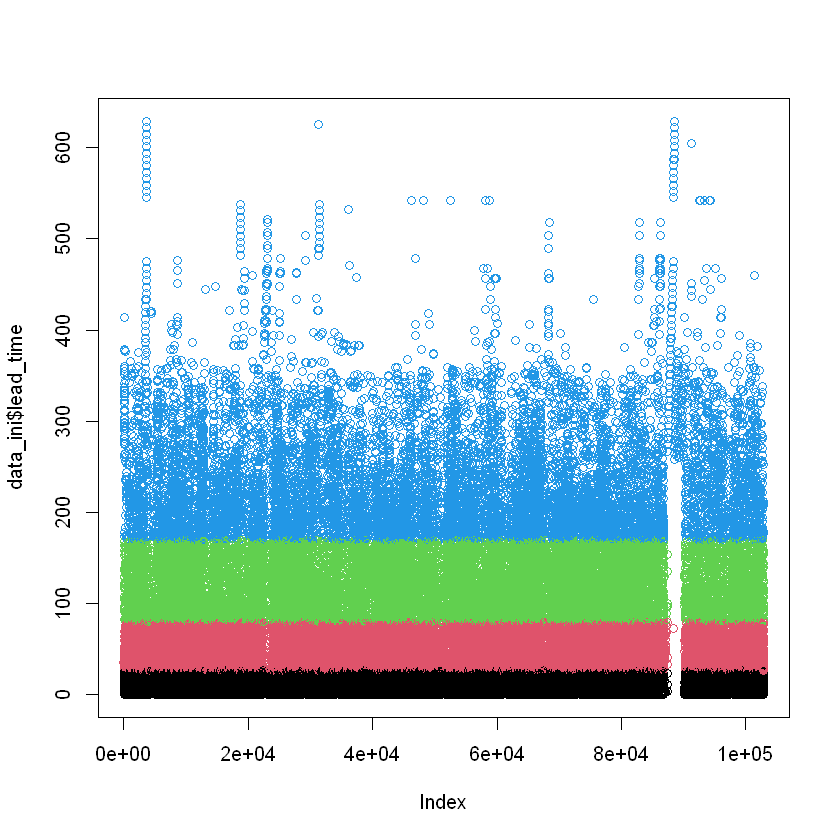

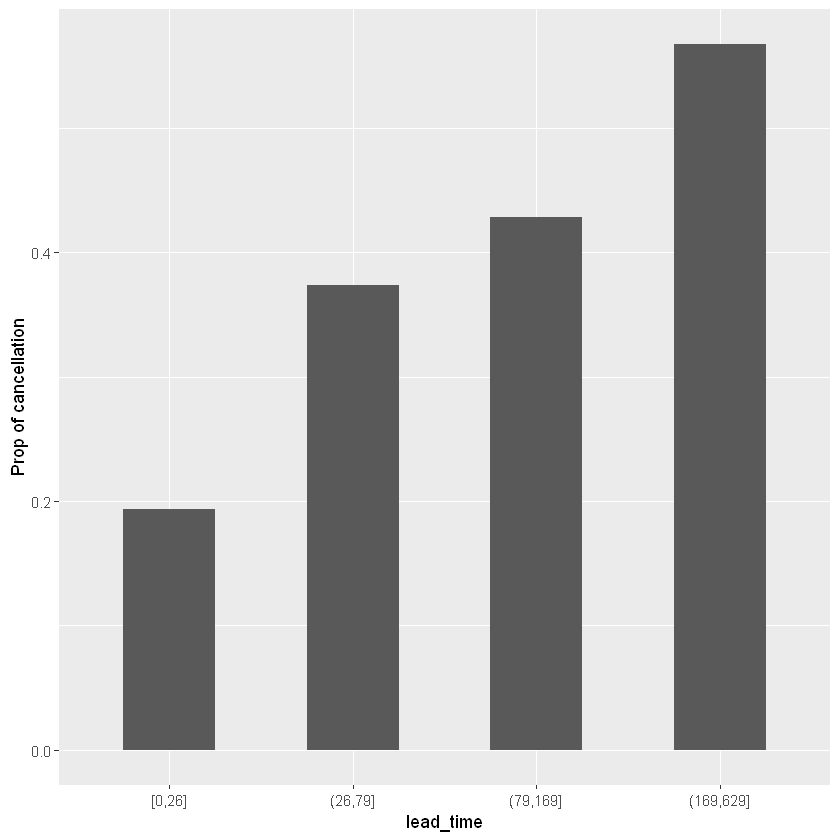

In [15]:
nbins <- 4 #分箱区间个数 

equal_freq_lead <- discretize(data_ini$lead_time,'equalfreq',nbins = nbins) #等频分箱操作

table(equal_freq_lead) #查看各分类数量
plot(data_ini$lead_time,col = equal_freq_lead$X) #用颜色表示等频分箱

data_1 <- data_ini$lead_time[order(data_ini$lead_time)] #对数据进行排序

#查看各分箱分割点
depreciation <- as.data.frame(table(equal_freq_lead))
depreciation
data_1[25868]
data_1[25868+25652]
data_1[25868+25652+25856]
data_1[25868+25652+25856+25518]

data_ini <-data_ini%>%mutate(lead_time = equal_freq_lead$X,
                            lead_time = as.character(lead_time))
#查看分箱后 lead_time 与 酒店预定取消率的关系
#lead_time 与酒店预定取消率 清晰很多，
#随着到达酒店的日期与预定酒单订单的日期之差的增长，酒店预定取消率逐渐升高，
#其中，当时间差为26天以内，取消率最低（大概19%），当时间差为26天到79天，取消率大概为37%，
#当时间差为79天到169天，取消率约为42%,当时间差为169天到629天，取消率超过50%,大概57%
data_ini%>%group_by(lead_time)%>%
    summarise(prop = mean(is_canceled))%>%
ggplot(aes(x = lead_time, y =prop))+
geom_bar(stat='identity',width =.5)+
scale_x_discrete(breaks = c('1','2','3','4'),
                 labels = c( "[0,26]","(26,79]", "(79,169]","(169,629]"))+
ylab('Prop of cancellation')
# scale_x_discrete(labels = c( "1" = "[0,26)", "2"="[26,79)", "3" ="[79,169)","4" = "[169,629]"))


* 同样的等频分箱逻辑可以应用在agent 变量上

Warning message:
"position_stack requires non-overlapping x intervals"


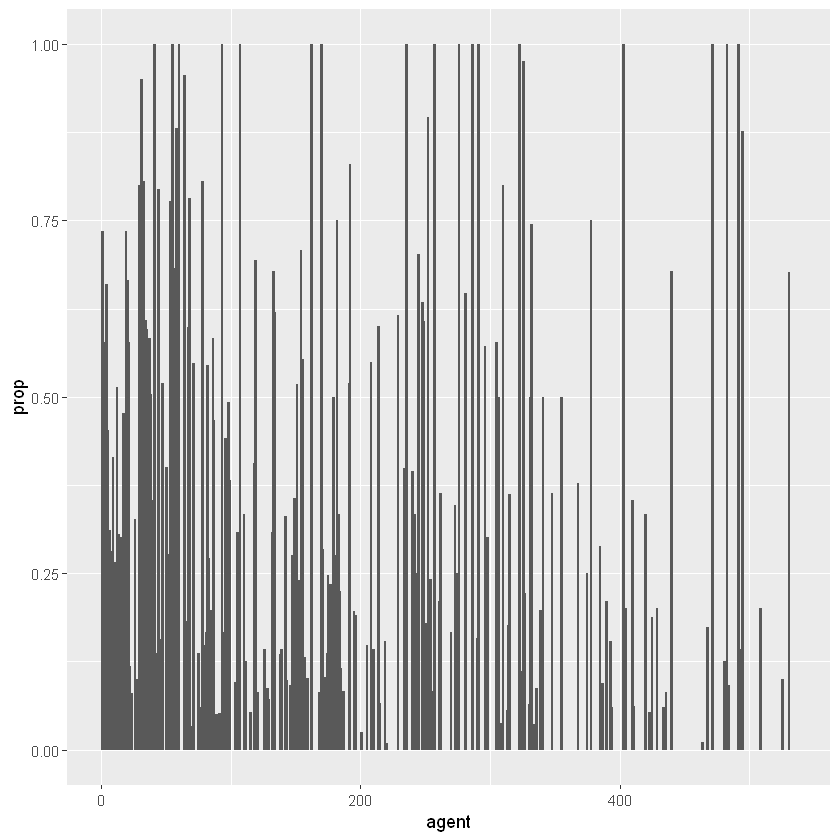

In [16]:
#分箱之前查看 agent 与酒店预定取消率的关系,可见两者之间关系非常模糊
data_ini%>%group_by(agent)%>%summarise(prop = mean(is_canceled))%>%
ggplot(aes(x = agent, y =prop))+
geom_bar(stat='identity',width =2)

equal_freq_agent
    1     2     3 
49360 19558 33976 

equal_freq_agent,Freq
<fct>,<int>
1,49360
2,19558
3,33976


[1] 9

[1] 85

[1] 535

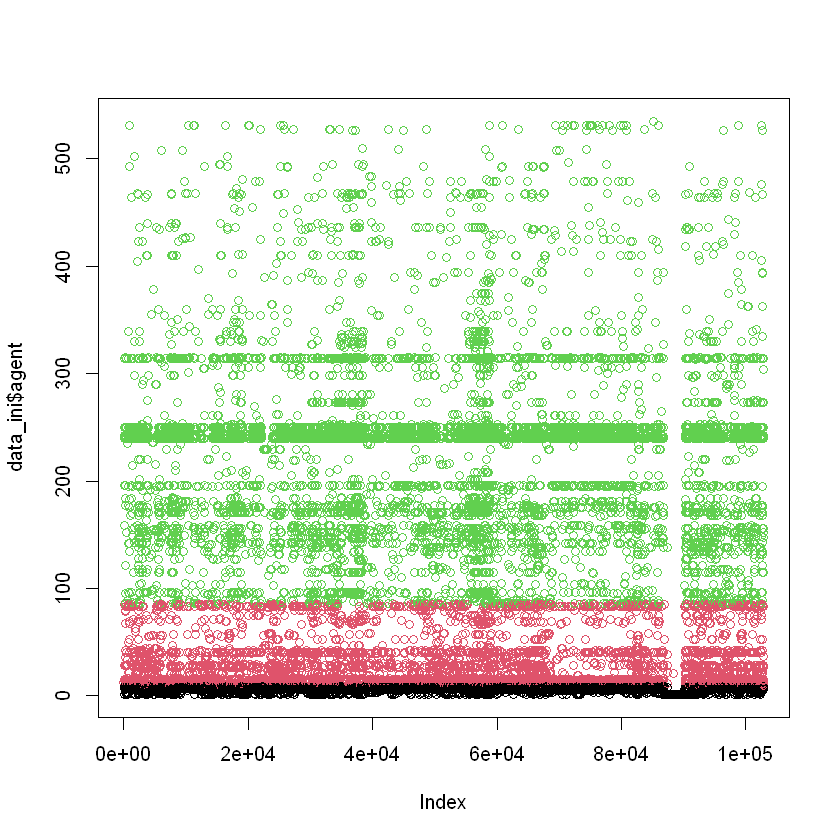

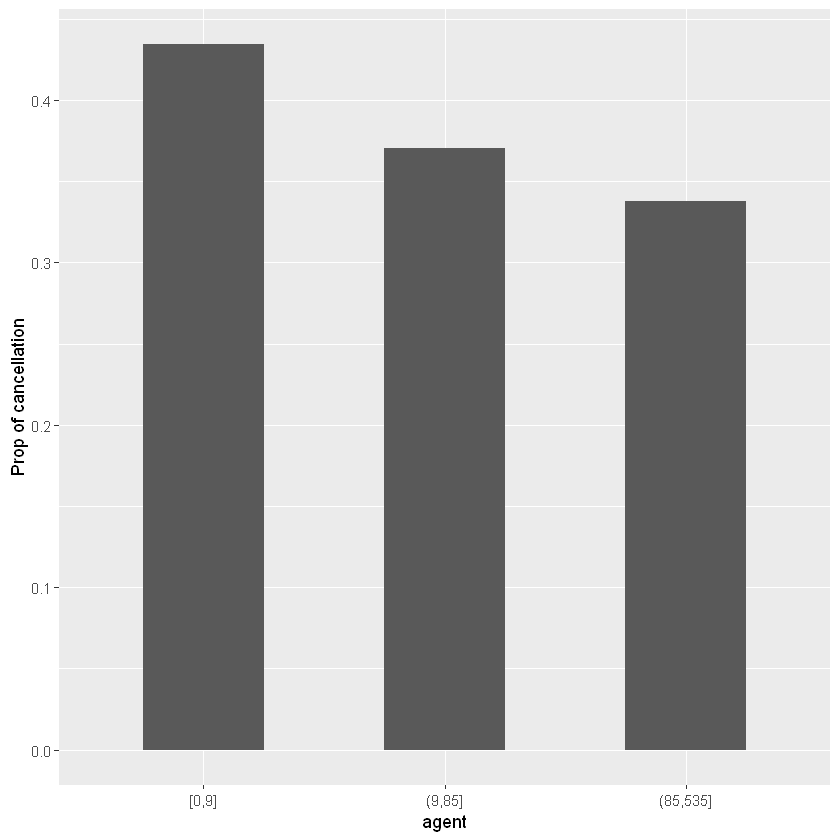

In [17]:
nbins <- 3  #分箱区间个数 

equal_freq_agent <- discretize(data_ini$agent,'equalfreq',nbins = nbins) #等频分箱操作

table(equal_freq_agent) #查看各分类数量
plot(data_ini$agent,col = equal_freq_agent$X) #用颜色表示等频分箱

data_2 <- data_ini$agent[order(data_ini$agent)] #对数据进行排序

#查看各分箱分割点
depreciation <- as.data.frame(table(equal_freq_agent))
depreciation
data_2[49360]
data_2[49360+19558]
data_2[49360+19558+33976]


data_ini <- data_ini%>%mutate(agent = equal_freq_agent$X)%>%
    mutate(agent = as.character(agent))
#查看分箱后 agent 与 酒店预定取消率的关系
#分箱之后， agent与酒店预定取消率 清晰很多，agent位于[0,9]区间，其用户预定订单取消率最高，
#在(9,85]区间，其用户预定订单取消率处于中等水平，
#在(85,535]区间，其用户预定订单取消率处于最低水平
data_ini%>%group_by(agent)%>%
    summarise(prop = mean(is_canceled))%>%
ggplot(aes(x = agent, y =prop))+
geom_bar(stat='identity',width =.5)+
scale_x_discrete(labels = c( "1" = "[0,9]", "2"="(9,85]", "3" = "(85,535]"))+
ylab('Prop of cancellation')

* `days_in_waiting_list` 96.6%的取值都是0，剩余3.4%的取值为其他值,因此我们将其他所有取值都包含成一个值

days_in_waiting_list,n,prop
<chr>,<int>,<dbl>
0,99355,0.96560538
1 or more,3539,0.03439462


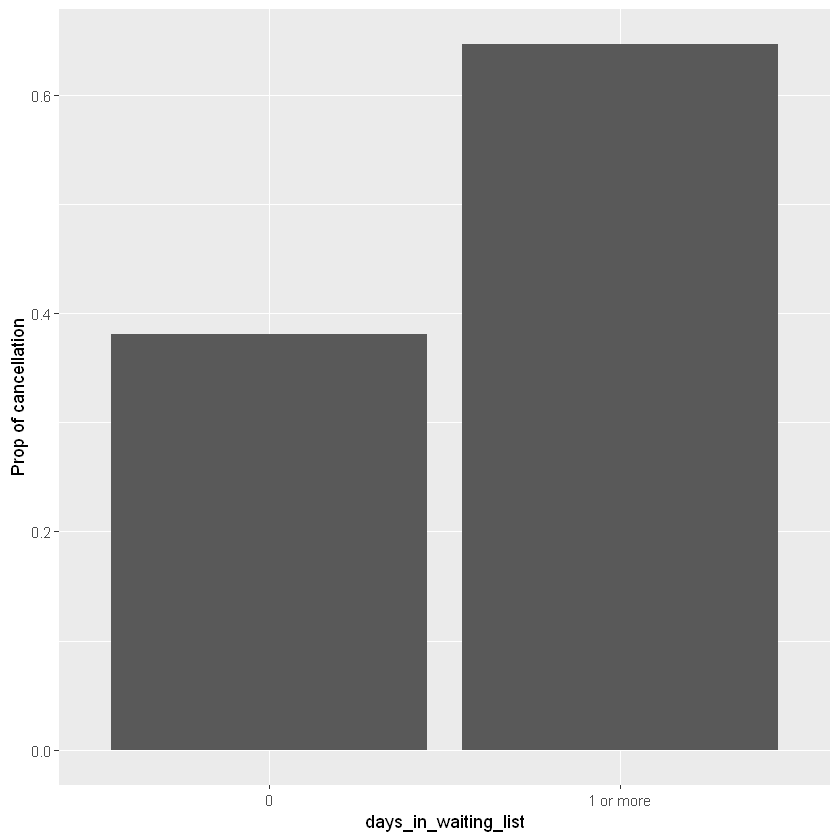

In [18]:
#-----------处理days_in_waiting_list异常值
data_ini <- data_ini%>% mutate(days_in_waiting_list = as.character(days_in_waiting_list))%>%
mutate(days_in_waiting_list = if_else(as.numeric(days_in_waiting_list)>0,'1 or more',days_in_waiting_list))  

test <- data_ini%>%group_by(days_in_waiting_list)%>%
 count(days_in_waiting_list)
test%>%mutate(prop = n/102894)
#查看该变量与 取消率的关系
#当用户等待时间为0天时，取消率大概为38%，而如果用户等待时间为1天或者超过1天时，则取消率达65%
data_ini%>%ggplot(aes(x = days_in_waiting_list, y =is_canceled))+
geom_bar(stat='summary',fun= 'mean')+
ylab('Prop of cancellation')

* 处理`stays_in_weekend_nights`:               
* 将大于3的取值视为异常值 亦或离群值，又由于 3 的取值比较，                
* 故将大于3的样本一并归入 取值为3 的样本集，并且重新离散化，且命名为 "3 or more".            
* 同样的逻辑可应用到自变量 `stays_in_week_nights`            

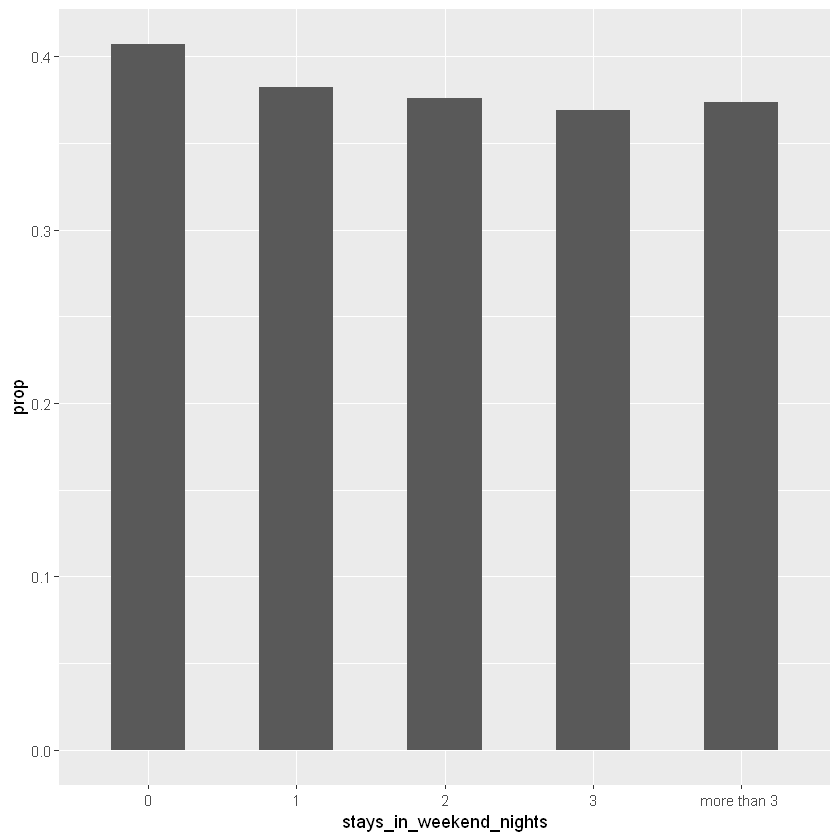

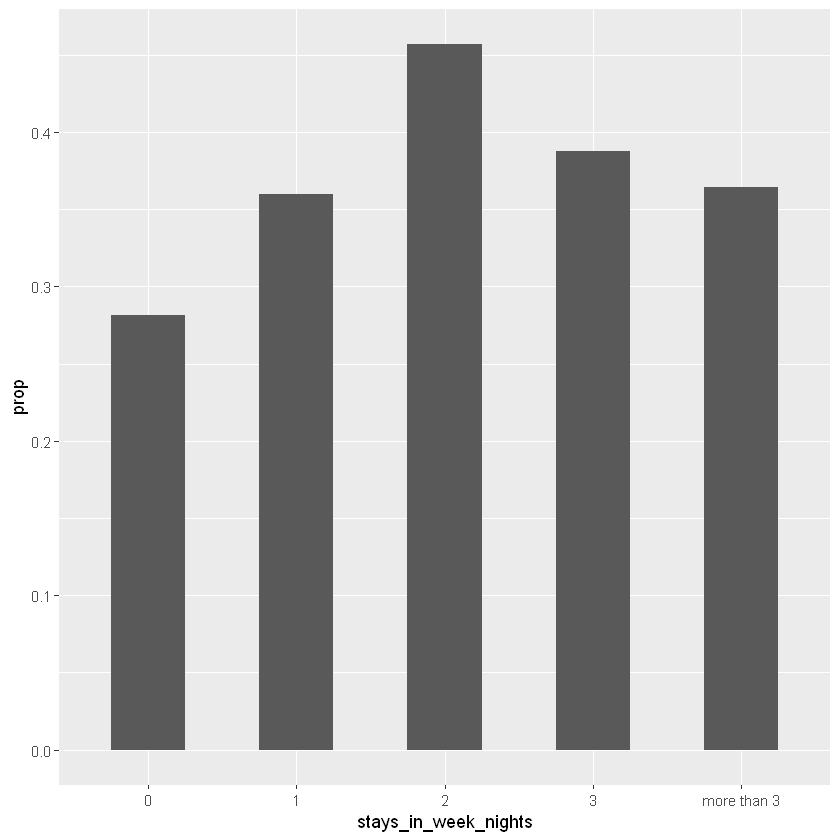

In [19]:
data_ini <- data_ini%>% mutate(stays_in_weekend_nights = as.character(stays_in_weekend_nights),
                           stays_in_week_nights = as.character(stays_in_week_nights ))%>%
mutate(stays_in_weekend_nights = if_else(as.numeric(stays_in_weekend_nights)>3, 'more than 3 ',stays_in_weekend_nights),
       stays_in_week_nights = if_else(as.numeric(stays_in_week_nights)>3,'more than 3',stays_in_week_nights))    
#查看处理异常值之后变量与酒店预定取消率的关系
#用户预定酒店选择入住的周末日的天数为0天时，取消率最高，大概41%，
#当天数从1天加到3天时，取消率轻微地下降，从41%降到37%，而当天数超过3天时，取消率反而轻微升高，大概为38%。
data_ini%>%group_by(stays_in_weekend_nights)%>%
    summarise(prop = mean(is_canceled))%>%
ggplot(aes(x = stays_in_weekend_nights, y =prop))+
geom_bar(stat='identity',width =.5)
#用户预定酒店选择入住的工作日的天数为2天时，取消率最高，大概46%，
#当天数为0天时，取消率最低，大概27%，
#当天数从1天,3天或者超过3天时，取消率彼此相似，分别大概为36%，38%，36.5%
data_ini%>%group_by(stays_in_week_nights)%>%
    summarise(prop = mean(is_canceled))%>%
ggplot(aes(x = stays_in_week_nights, y =prop))+
geom_bar(stat='identity',width =.5)

In [20]:
#previous_cancellations :Number of previous bookings that were cancelled by the customer prior to the current booking
#previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
c <- c('previous_cancellations','previous_bookings_not_canceled','booking_changes','total_of_special_requests')
num_data_c <- data_ini[c]
for( i in 1:ncol(num_data_c)){
print(paste('description of',c[i],':'))
print(table(num_data_c[,i]))
print(summary(num_data_c[,i]))}
data_ini<- data_ini%>%mutate(previous_cancellations = ifelse(previous_cancellations==0,0,'1 or more'),
                        previous_bookings_not_canceled = ifelse(previous_bookings_not_canceled ==0,0,"1 or more"),
                        booking_changes = ifelse(booking_changes == 0, 0,"1 or more"),
                        total_of_special_requests = ifelse(total_of_special_requests == 0,0,
                                                           ifelse(total_of_special_requests == 1,1,'2 or more')))

[1] "description of previous_cancellations :"

    0     1     2     3     5     6    11    13    14    21    24    25    26 
97339  5384    36     9     1     6    25     4    14     1    24    25    26 
 previous_cancellations
 Min.   : 0.00000      
 1st Qu.: 0.00000      
 Median : 0.00000      
 Mean   : 0.07722      
 3rd Qu.: 0.00000      
 Max.   :26.00000      
[1] "description of previous_bookings_not_canceled :"

     0      1      2      3      4      5      6      7      8      9     10 
101909    605    145     59     43     38     22     12      8      9      9 
    11     12     13     14     15     16     17     18     19     20     21 
     3      4      3      3      2      3      2      1      2      2      2 
    22     23     24     25     50 
     4      1      1      1      1 
 previous_bookings_not_canceled
 Min.   : 0.00000              
 1st Qu.: 0.00000              
 Median : 0.00000              
 Mean   : 0.02436              
 3rd Qu.: 0.00000           

#### 2.4 特征编码
截至目前为止，数据一共有4个类别型变量，19个数值型变量，1个二元目标变量，为了方便接下来的建模分析，我们需要对类别型变量进行编码.                
字段编码分为两种：One-hot独热编码 以及 labelencoder           
对于拥有两个类别的变量，我们采用labelencode，拥有两个及以上的变量并且可以单独将一个类作为一个新列，我们则可以采用独热编码，                      
在这里我们用dummyVars 实现独热编码创造虚拟变量,这个目的是可以将非连续性变量不同取值看作一个新的特征。            

In [21]:
#We convert the the categorical variables into boolean values (One-hot encoding)
dummy <- dummyVars(" ~ .", data=data_ini,fullRank = TRUE)

data_modeltrs <- data.frame(predict(dummy,newdata =data_ini))

In [22]:
glimpse(data_modeltrs)

Rows: 102,894
Columns: 74
$ hotelResort.Hotel                       <dbl> 0, 0, 1, 1, 1, 1, 1, 1, 1, ...
$ is_canceled                             <dbl> 1, 0, 1, 1, 0, 0, 0, 1, 0, ...
$ lead_time2                              <dbl> 1, 0, 0, 1, 1, 0, 0, 0, 0, ...
$ lead_time3                              <dbl> 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
$ lead_time4                              <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month10                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month11                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month12                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month2                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month3                     <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month4                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month5                     <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
$ arrival_date_month6     

### 3 划分训练集与测试集
我们按照7：3的比例，随机将数据集分成训练集与测试集

In [23]:
#Hold-out set
#split dataset into training set (70%)and testing set(30%)
set.seed(1024)
data_modeltrs <- data_modeltrs%>%mutate(is_canceled = as.factor(is_canceled))
train_index <- sample(1:nrow(data_modeltrs),0.7*nrow(data_modeltrs))
test_index <- setdiff(1:nrow(data_modeltrs), train_index)

# bulid train and test dataset
train <- data_modeltrs[train_index,]  # for the use of modeling
test<- data_modeltrs[test_index,]

###  4 特征筛选
特征筛选分为：过滤器，包装器以及嵌入式筛选 
* 过滤器筛选指的是 利用 目标变量与自变量之间的相关性之类的指标，不需要依靠建模，在数据预处理阶段就可以对特征进行排名实现特征筛选。           
常见方法有：卡方检验卡方值筛选法，方差分析筛选法，T检验统计值筛选法，随机森林特征重要性筛选法等等               
* 包装器筛选指的是 可以从原有特征集筛选出最优特征子集，再给定评估指标，从而返回最佳的分数。
常见方法有：序列向前/后浮动筛选法，穷举法，减r增l法以及遗传算法等等          
* 嵌入式筛选指的是 将特征筛选和用来最后给数据建模的模型结合起来，模型建立过程中就能够根据自身带来的系数或者其他相关衡量排名指标而实现对特征的筛选。   
常见方法有：逻辑回归模型系数           
本项目利用 过滤器中的随机森林的特征重要性来进行特征筛选。特征重要性的计算方法基于袋外数据OOB的准确率来进行特征筛选的，具体可以详细参考generateFilterValuesData（）的method参数介绍，官方网址为https://mlr.mlr-org.com/articles/tutorial/filter_methods.html

In [507]:
#define a classification task for festure selection of `mlr`

train.task <- makeClassifTask(data = train,target = 'is_canceled')

# use filter method `random forest importance` for festure selection

var_importance <- generateFilterValuesData(train.task,
                method = 'randomForest_importance')

name,type,filter,value
<chr>,<chr>,<fct>,<dbl>
previous_cancellations1.or.more,numeric,randomForest_importance,88.82323
total_of_special_requests1,numeric,randomForest_importance,86.75581
total_of_special_requests2.or.more,numeric,randomForest_importance,83.25729
deposit_typeNon.Refund,numeric,randomForest_importance,78.48452
required_car_parking_spaces1,numeric,randomForest_importance,77.86700
lead_time2,numeric,randomForest_importance,77.85149
lead_time4,numeric,randomForest_importance,71.24750
booking_changes1.or.more,numeric,randomForest_importance,71.05977
lead_time3,numeric,randomForest_importance,70.61711


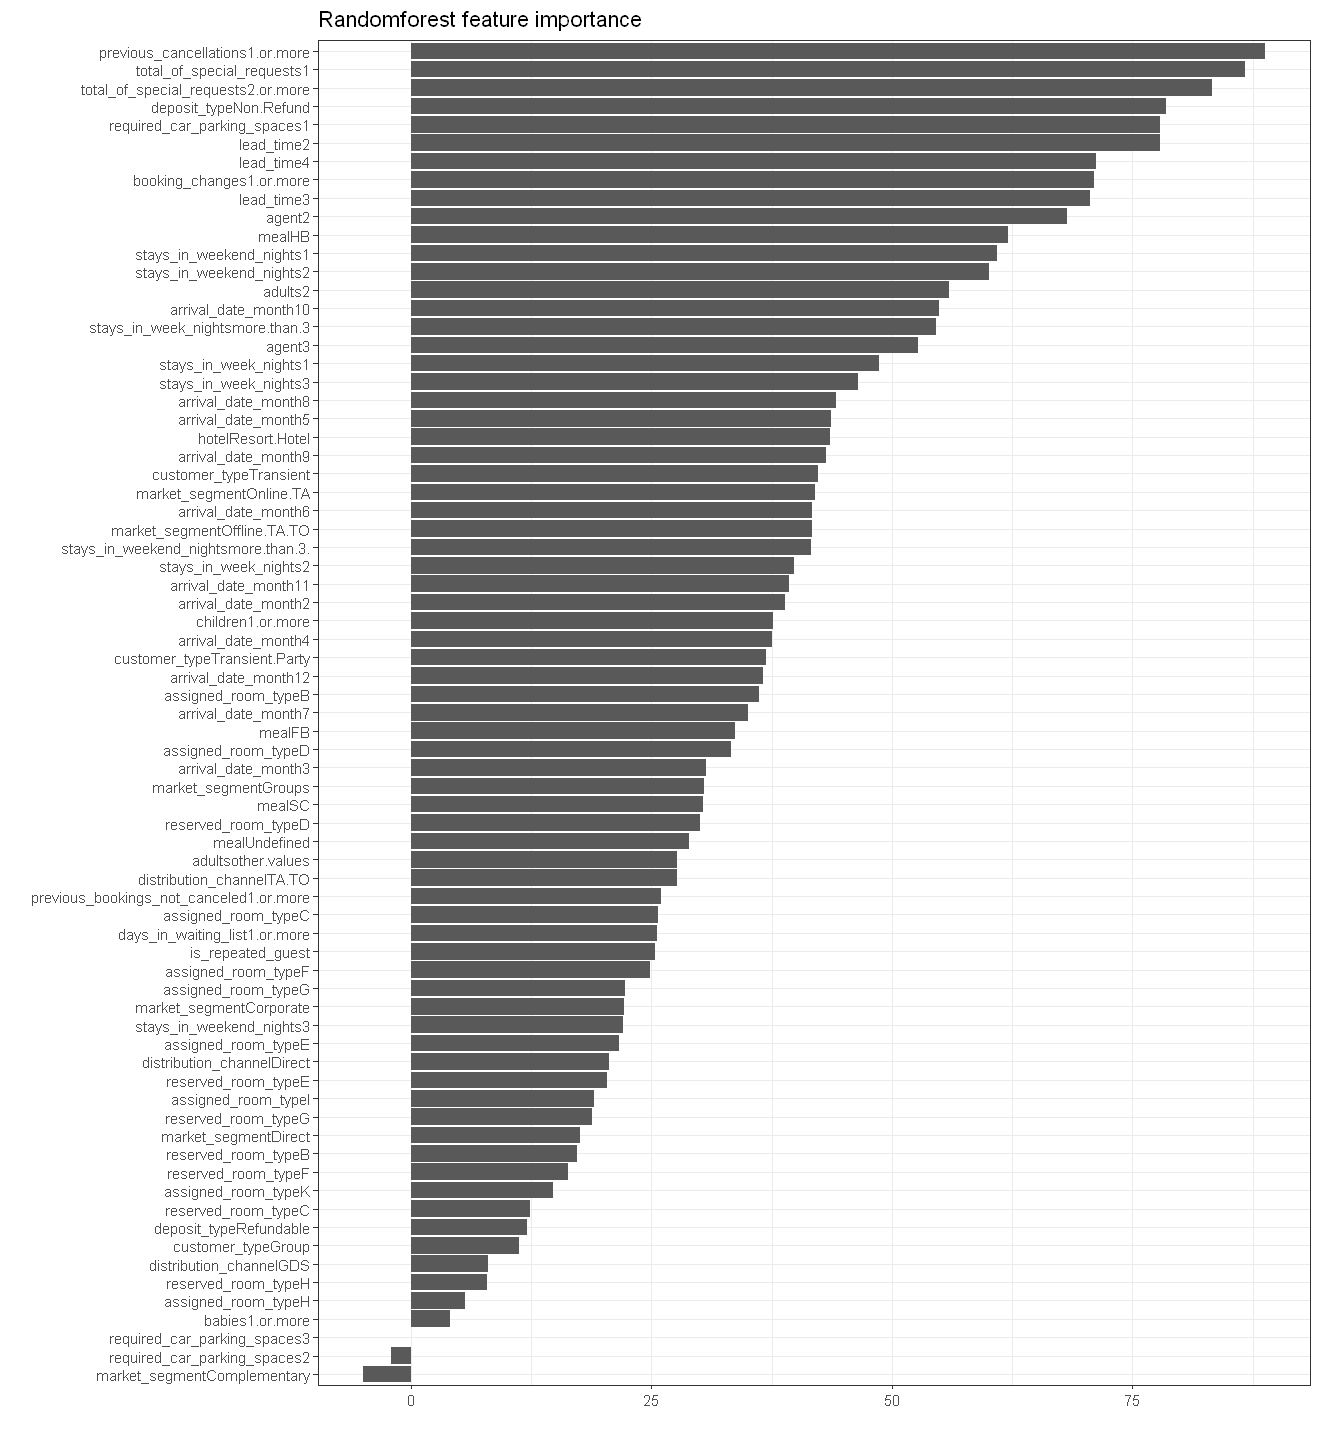

In [571]:
plotFilterValues(var_importance,sort = 'inc') + 
    coord_flip()+theme_bw() +
    labs(title = 'Randomforest feature importance')

imp_df <- var_importance$data

imp_df%>%arrange(desc(value))%>%slice(1:10)



## 四. 数据探索性分析--可视化

接下来，我们将前十个最重要特征筛选出来，并进行可视化分析，对用户进行画像刻画
* 首先观察`previous_cancellations` 与 酒店预定取消率的关系，可见，当用户再次之前取消过酒店一次或一次以上，取消率高达大约97%；
而当用户之前没有取消过，则取消率仅为37%左右
* 对于`total_of_special_requests`，当用户提出特殊要求时，比如说1个或者2个以及以上，用户订单取消率较低，大约23%，而当用户没有提出特殊要求，取消率高达51%左右
* 对于`deposit_type`,我们可以发现当酒店押金不能退的时候，取消率异常高，几乎100%,而其他两种类型比如 ‘可退押金’，‘无需押金’取消率分别为 50%,30%左右。这与业务直觉逻辑不相符，一般来说，如果酒店的押金不可退，用户们应该不会倾向于取消酒店，针对该特殊情况，经过在论坛的一番查阅，造成该数据现象的原因大概是 很多用户在申请签证的过程中，证明资料需要有前往国家地区的地址这一栏，而用户的资料办理一般都是网站进行，并且选择的酒店并不会真正入住，会在酒店确认前就予以取消，并且在确认期间，用户一般填的都是虚假信用卡账号信息，所以即便到时间了银行卡也不会被扣款，用户不用担心预订酒店会造成任何损失；另外，有真正需求的用户一般不会选择 ‘Non refund’酒店类型入住；此外，我们可以结合用户预定酒店的渠道`distribution_channel` 以及 `is_canceled`，可以发现在‘Non refund’结合其他两个无押金，可退押金酒店类型用户基本都是通过 `TA/TO`渠道预定，这也可以一定程度解释上述现象。
* 对于`required_car_parking_spaces`，我们可以发现当顾客提出但凡至少有一个停车位，酒店取消率基本为0，而如果用户没有提出停车位的要求，取消率则大概为39%
* 对于`lead_time`，随着到达酒店的日期与预定酒单订单的日期之差的增长，酒店预定取消率逐渐升高，其中，当时间差为26天以内，取消率最低（大概19%），当时间差为26天到79天，取消率大概为37%，当时间差为79天到169天，取消率约为42%,当时间差为169天到629天，取消率超过50%,大概57%
* 对于 `booking_changes`, 我们可以发现，随着用户预定之后修改订单的次数有1次或者1次以上，酒店预定取消率是比较低的，大概为20%，如果用户没有做出任何修改，取消率则接近40%
* 对于`agent`，可见，当用户通过ID为0到9的代理机构预定酒店，用户取消率最高，大概为43.75%，当用户通过ID为10到85，预定取消率大约为37.5%，当用户通过ID为86到535预定酒店，取消率最低，为35.5%

综上所述，我们可以总结描述出哪些用户最容易取消预定订单，这类用户具有的特征大致为以下几点（按特征重要性进行排名）：【注意：取消率百分比大小跟特征重要性排名之间不存在相关关系】             
①之前取消过预定酒店的订单（97%取消率）                    
②预定酒店没有提出特殊要求（51%）         
③预定不退还押金的酒店类型（几乎100%）  
④没有提出停车位的需求（39%）              
⑤当选择到达酒店入住的日期距离预定酒店订单的日期时间差超过五个半月（57%）             
⑥用户预定酒店订单后没有做出任何修改（40%）             
⑦通过ID为0-9的代理机构预定酒店（43.75%）  

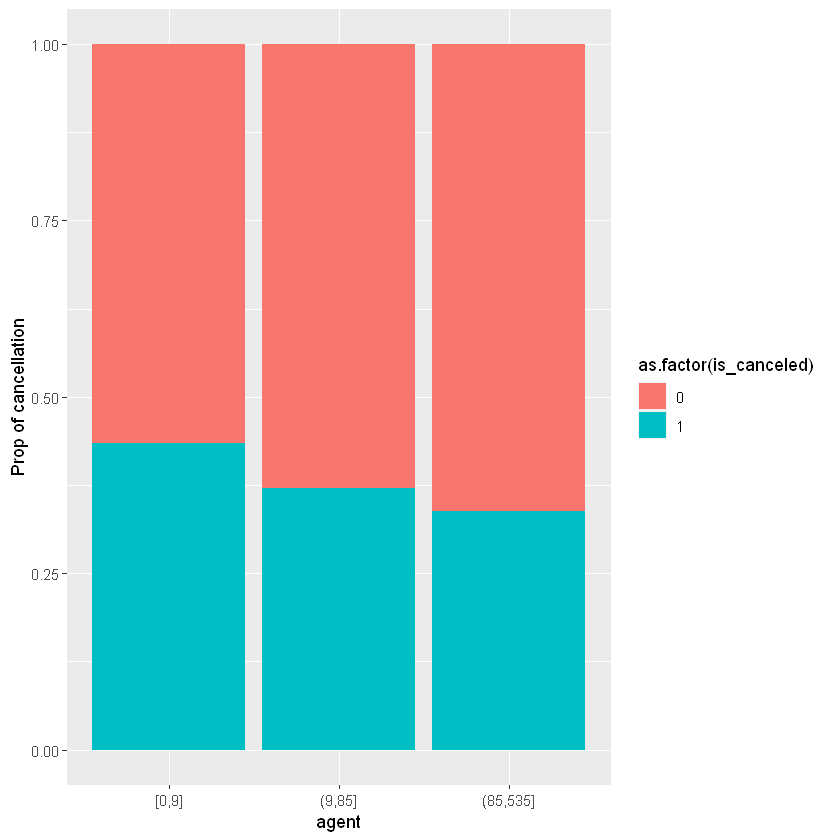

In [24]:
data_ini%>%ggplot()+
    geom_bar(aes(x = agent,
                 fill =as.factor(is_canceled)),
            position = 'fill')+
    ylab('Prop of cancellation')+
scale_x_discrete(labels = c( "1" = "[0,9]", "2"="(9,85]", "3" = "(85,535]"))

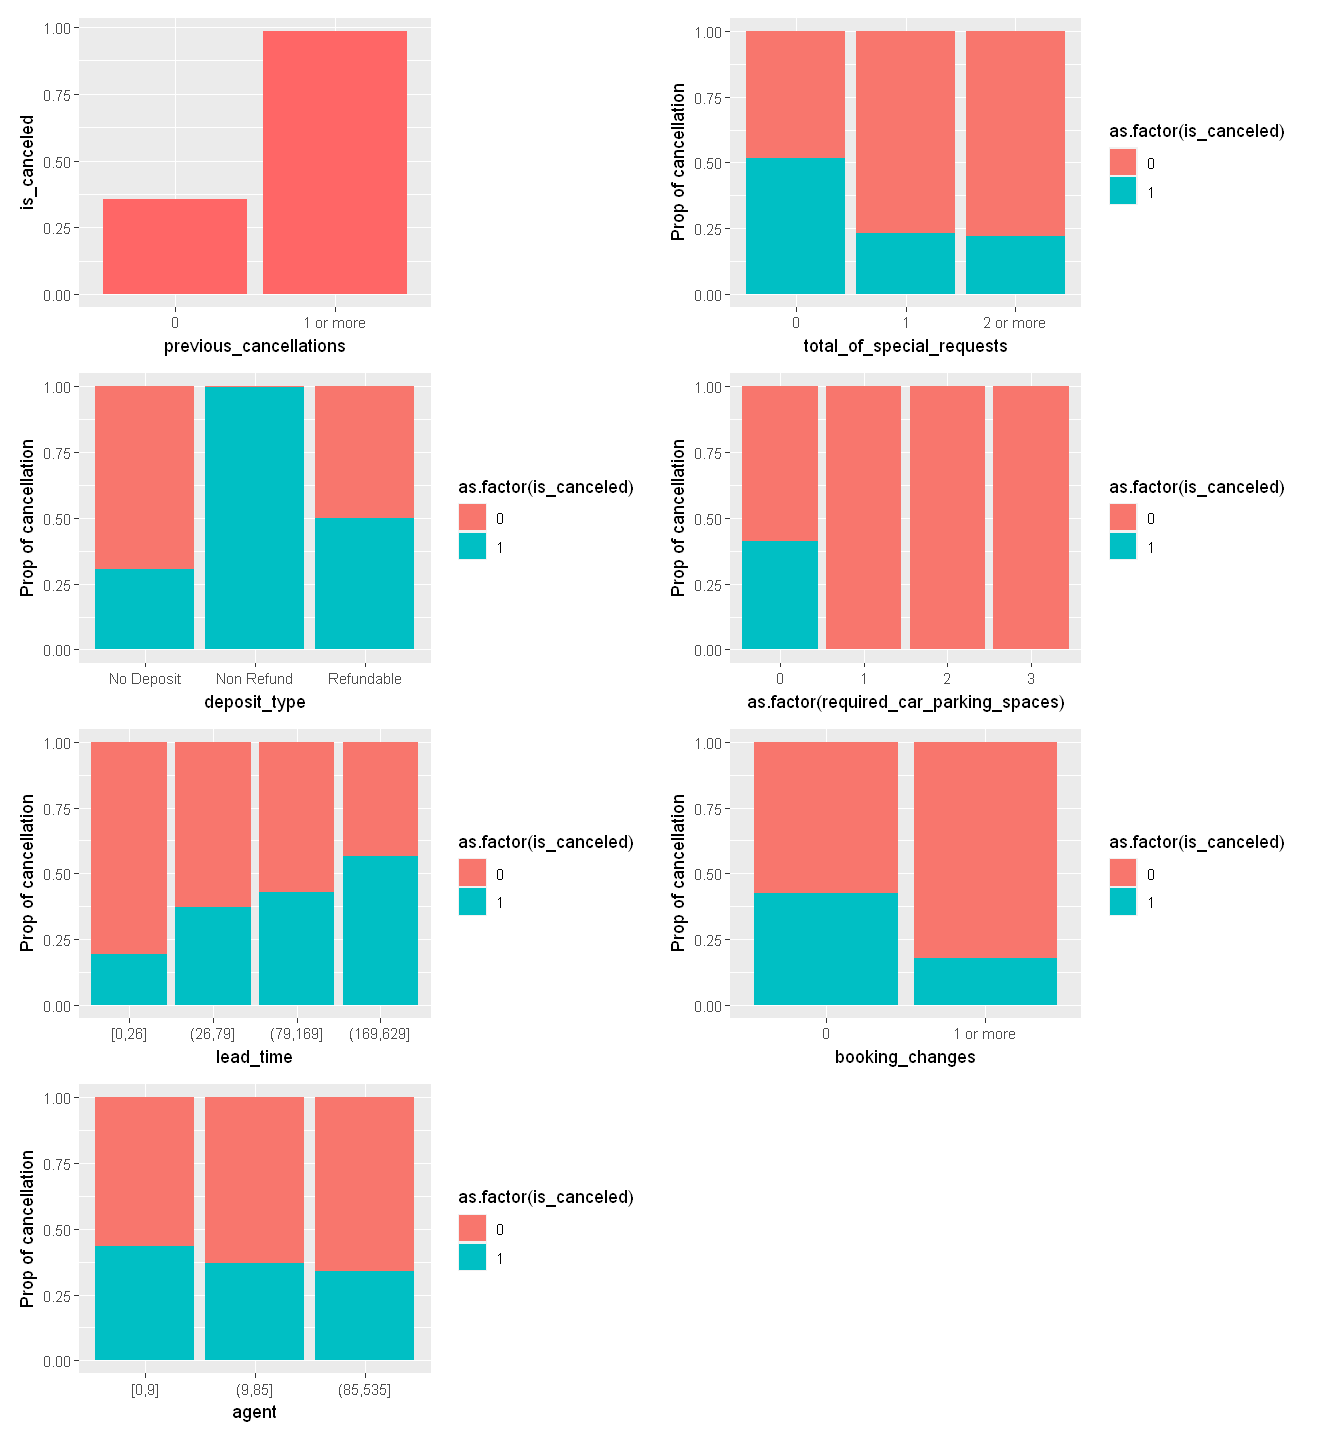

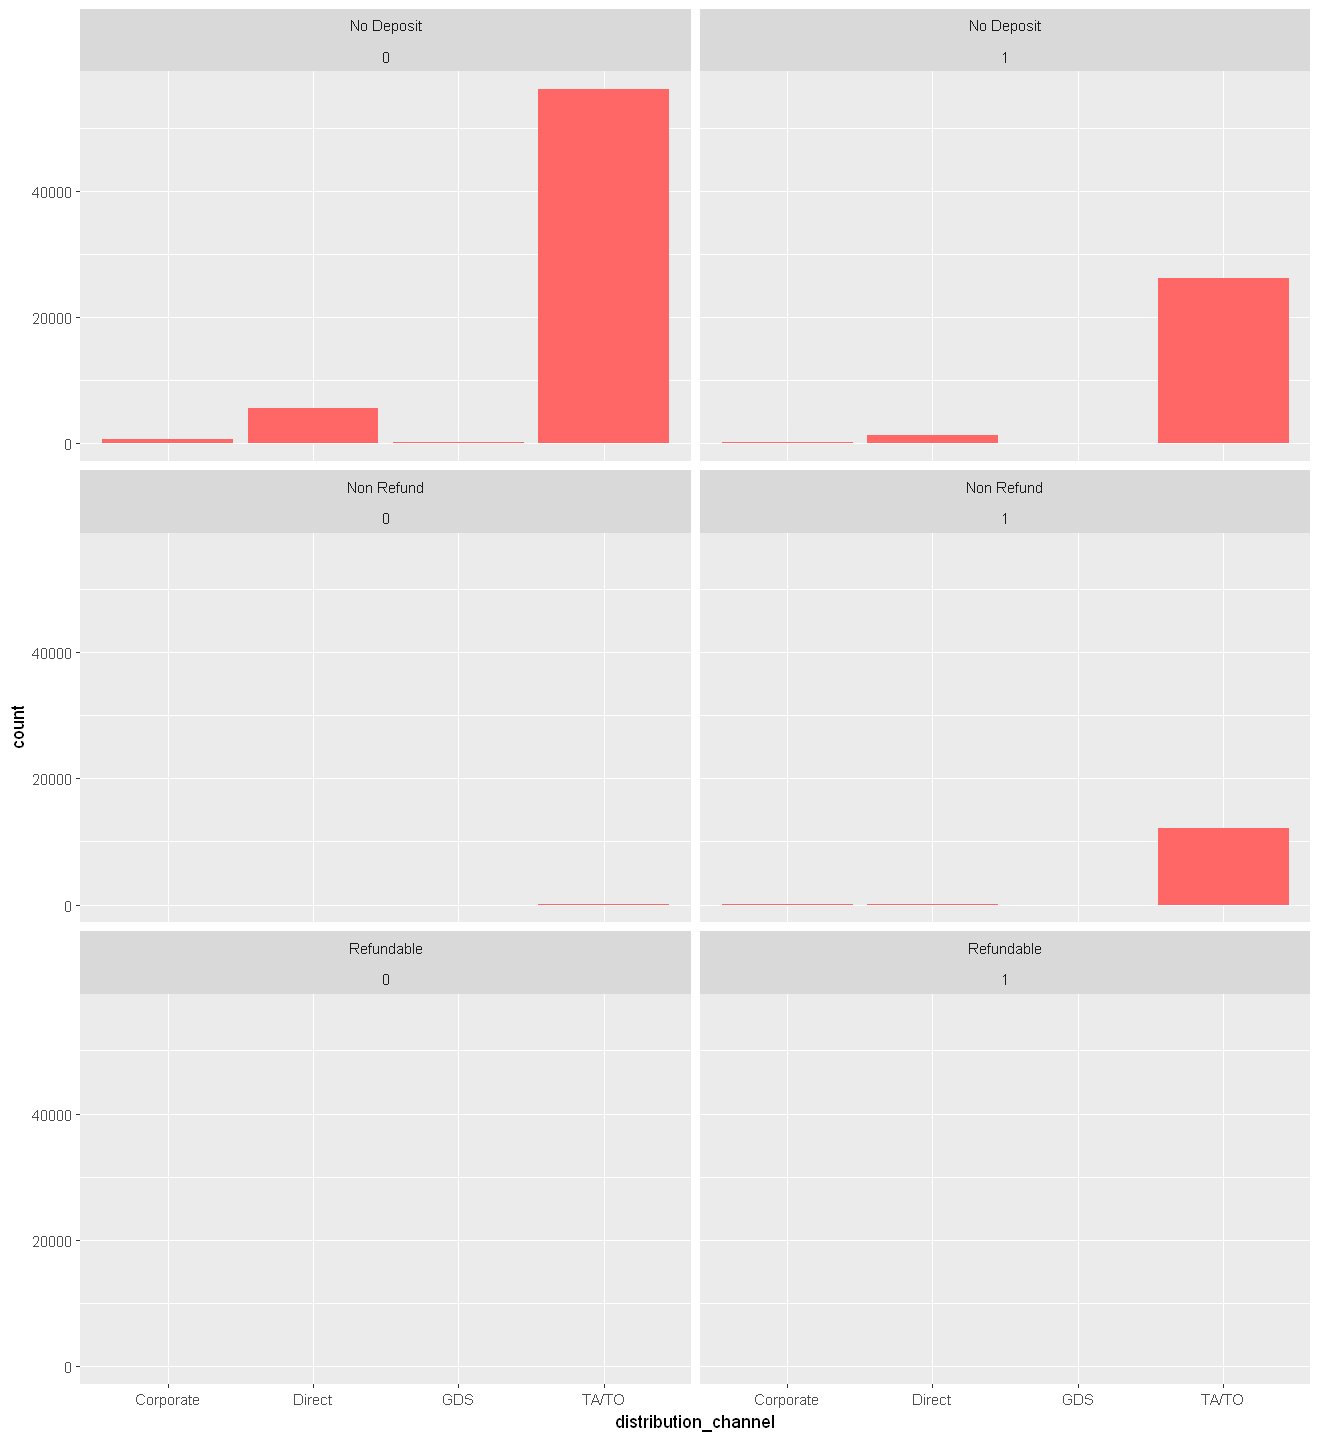

In [25]:
options(repr.plot.width = 11, repr.plot.height = 12)
q1 <- data_ini%>% ggplot(aes(x = previous_cancellations ,y= is_canceled))+
geom_bar(stat='summary',fun = 'mean',fill = '#FF6666')
q2 <-data_ini%>%ggplot()+
    geom_bar(aes(x = `total_of_special_requests`,
                 fill =as.factor(is_canceled)),
            position = 'fill')+
    ylab('Prop of cancellation')
q3 <- data_ini%>%ggplot()+
    geom_bar(aes(x = deposit_type,
                 fill =as.factor(is_canceled)),
            position = 'fill')+
    ylab('Prop of cancellation')
q4 <- data_ini%>%ggplot()+
    geom_bar(aes(x = distribution_channel),fill = '#FF6666')+
    facet_wrap(~deposit_type+as.factor(is_canceled),ncol = 2,)
q5 <- data_ini%>%ggplot()+
    geom_bar(aes(x = as.factor(`required_car_parking_spaces`),
                 fill =as.factor(is_canceled)),
            position = 'fill')+
    ylab('Prop of cancellation')
q6<- data_ini%>%ggplot()+
    geom_bar(aes(x =lead_time,
                 fill =as.factor(is_canceled)),
            position = 'fill')+
    scale_x_discrete(breaks = c('1','2','3','4'),
                     labels = c( "[0,26]","(26,79]", "(79,169]","(169,629]"))+
    ylab('Prop of cancellation')
q7 <- data_ini%>%ggplot()+
    geom_bar(aes(x = booking_changes,
                 fill =as.factor(is_canceled)),
            position = 'fill')+
    ylab('Prop of cancellation')
q8 <- data_ini%>%ggplot()+
    geom_bar(aes(x = agent,
                 fill =as.factor(is_canceled)),
            position = 'fill')+
scale_x_discrete(labels = c( "1" = "[0,9]", "2"="(9,85]", "3" = "(85,535]"))+
    ylab('Prop of cancellation')
q1+q2+q3+q5+q6+q7+q8+plot_layout(ncol=2)
q4

# 五、建模分析
接下来，我们利用特征重要性排前十的重要特征建立逻辑回归模型，这样建立出来的模型，准确率较高并且由于模型本身的优点，可解释性也较强。
为了可以看到每个变量带来的边际效应，我们用glm（）函数建立广义线性模型的方法来建立逻辑回归模型
* 结果发现，除了`required_car_parking_spaces1`变量，其他自变量均统计上99%显著，为了分析`required_car_parking_spaces1`不显著的原因，我们画出 `required_car_parking_spaces` 与 取消率之间的关系，我们会发现，当required_car_parking_spaces1稍微不取0，概率值几乎为0，曲线在x=0 这个分割点分割的很开，我们发现这里有一个原因可能是 `required_car_parking_spaces1`这个变量的标准误太大了，是其他变量的600多倍，这个P值估算是根据 `Wald test`来计算的，其计算公式为$Z-statistic = \frac{\hatβ}{Se}$，我们发现当分母非常大时，Z值会很小，导致返回的P值则很大，这可能是`wald test`自身带来的一个bug，因为我们更换其他参数系数检验方法 `Lr test 似然比检验`,这用来比较两个嵌套模型的好坏，原假设模型的部分或者一个参数受到约束，一般我们会约束为0；结果算出来  p = 0 因此我们拒绝原假设H0 , 即 我们不剔除`required_car_parking_spaces1`，该变量对模型有重要影响。

Recall that 
 **Likelihood-ratio statistic** $$LR = -2 \ln \left[ \frac{ \sup_{\theta \in \Theta_0} \mathcal{L}(\theta) }{ \sup_{\theta \in \Theta} \mathcal{L}(\theta) } \right]$$ where $\sup_{\theta \in \Theta_0} \mathcal{L}(\theta)$  is the restricted maximized  likelihood and $\sup_{\theta \in \Theta} \mathcal{L}(\theta)$ is the unrestricted maximized likelihood.

In [26]:
#selection top 10 importance feature to bulid logistic regression model
top_10 <- c('is_canceled',
                 'previous_cancellations1.or.more',
                    'total_of_special_requests1', 
                    'total_of_special_requests2.or.more', 
                    'deposit_typeNon.Refund',
                    'required_car_parking_spaces1',
                    'lead_time2', 
                    'lead_time4', 
                    'booking_changes1.or.more',
                    'lead_time3',
                    'agent2')

#没有约束模型 H1；required_car_parking_spaces1 的系数不为0
log_ur <-glm(is_canceled ~ previous_cancellations1.or.more+
    total_of_special_requests1+
    total_of_special_requests2.or.more+
    deposit_typeNon.Refund+
    required_car_parking_spaces1+
    lead_time2+
    lead_time4+
    booking_changes1.or.more+
    lead_time3+
    agent2,
    family = binomial(link = "logit"),data = train)
summary(log_ur)

#约束模型 H0：required_car_parking_spaces1 的系数为0
log_r_car <-glm(is_canceled ~ previous_cancellations1.or.more+
    total_of_special_requests1+
    total_of_special_requests2.or.more+
    deposit_typeNon.Refund+
    lead_time2+
    lead_time4+
    booking_changes1.or.more+
    lead_time3+
    agent2,
    family = binomial(link = "logit"),data = train)
summary(log_r_car)

# LR TEST 
logLik(log_ur) #H1
logLik(log_r_car)#H0
lr_car <- 2*(logLik(log_ur)[1] - logLik(log_r_car)[1])
#chi-square statistic
pchisq(lr_car,1)
#p value 
print('P值:')
1 - pchisq(lr_car,1) # p= 0 因此我们拒绝原假设H0 , 即 我们不剔除`required_car_parking_spaces1`，该变量对模型有重要影响。


Call:
glm(formula = is_canceled ~ previous_cancellations1.or.more + 
    total_of_special_requests1 + total_of_special_requests2.or.more + 
    deposit_typeNon.Refund + required_car_parking_spaces1 + lead_time2 + 
    lead_time4 + booking_changes1.or.more + lead_time3 + agent2, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4067  -0.8672  -0.5048   1.0992   2.7901  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -0.77752    0.02243 -34.657   <2e-16 ***
previous_cancellations1.or.more      4.13459    0.15364  26.911   <2e-16 ***
total_of_special_requests1          -0.86557    0.02164 -40.007   <2e-16 ***
total_of_special_requests2.or.more  -0.95144    0.02865 -33.203   <2e-16 ***
deposit_typeNon.Refund               5.61299    0.16022  35.032   <2e-16 ***
required_car_parking_spaces1       -16.56035   60.95884  -0.272    0.786   


Call:
glm(formula = is_canceled ~ previous_cancellations1.or.more + 
    total_of_special_requests1 + total_of_special_requests2.or.more + 
    deposit_typeNon.Refund + lead_time2 + lead_time4 + booking_changes1.or.more + 
    lead_time3 + agent2, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4012  -0.8331  -0.5317   1.1160   2.8378  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -0.90286    0.02209  -40.87   <2e-16 ***
previous_cancellations1.or.more     4.16786    0.15078   27.64   <2e-16 ***
total_of_special_requests1         -0.87709    0.02136  -41.06   <2e-16 ***
total_of_special_requests2.or.more -0.98194    0.02827  -34.73   <2e-16 ***
deposit_typeNon.Refund              5.63468    0.16017   35.18   <2e-16 ***
lead_time2                          0.90560    0.02651   34.16   <2e-16 ***
lead_time4                          1.049

'log Lik.' -33512.39 (df=11)

'log Lik.' -34658.08 (df=10)

[1] 1

[1] "P值:"


[1] 0

In [27]:
#Plot the required_car_parking_spaces with `is_canceled` using data_ini_test which treat  required_car_parking_spaces as numeric var

top10_df <-data_ini_test
top10_df %>%
    ggplot(aes(x = required_car_parking_spaces,y = is_canceled))+
    geom_point()+
    geom_smooth(
        method = 'glm',
        method.args = list(family = binomial(link = 'logit')))+
    ggtitle('Logistic regression')+
    labs(y = 'Propability of cancelling booking/P(is_canceled =1),')

ERROR: Error in eval(expr, envir, enclos): 找不到对象'data_ini_test'


# 六. 边际效应 
逻辑回归目标函数: $$log(odd  ratio) = log(\frac{p(x)}{1-p(x)}) = β^TX$$
Sigmoid函数转化后:
$$p(x) = \frac{e^{β^TX}}{(1+e^{β^TX})}$$

* Note: p(x) mean the propability of canceling booking hotel by customers given x.

Marginal effect pf $x_k$$$\frac{\partial p}{\partial x_{k}} = \beta_{k}*p(x_k)(1-p(x_k))$$

从这个边际效应结果可看到，各个自变量对因变量都会产生不同的影响，其中对于最重要的特征`previous_cancellations1.or.more`来说，在其他自变量不变情况下，每增加一单位`previous_cancellations1.or.more`，用户取消预定酒店订单的概率便增加65%

In [ ]:
LogitScalar <- mean(dlogis(predict(log_ur, type = 'link')))
LogitScalar * coef(log_ur)

# 七、 AB test
### 1、样本比例检验
详见: https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prop.test          
还记得刚才有一个特征`total_of_special_requests`的不同取值分别为1，以及"2 or more"时，返回的取消率大概相似，这里我们想要检验这两个取值是否是否有差异，也就是不同取值是否一定会满足统计上的显著性差异，因此我们对此来做AB test检验。
我们可以通过ABtest 来进行，`total_of_special_requests`的不同取值设为不同样本组的不同方案，一共有两个取值，故我们设置两个方案
方案一：total_of_special_requests 为1，方案二为 total_of_special_requests 为"2 or more"


        0         1 2 or more 
    57956     30441     14497 

total_of_special_requests,is_canceled,n
<chr>,<dbl>,<int>
0,0,28071
0,1,29885
1,0,23375
1,1,7066
2 or more,0,11287
2 or more,1,3210


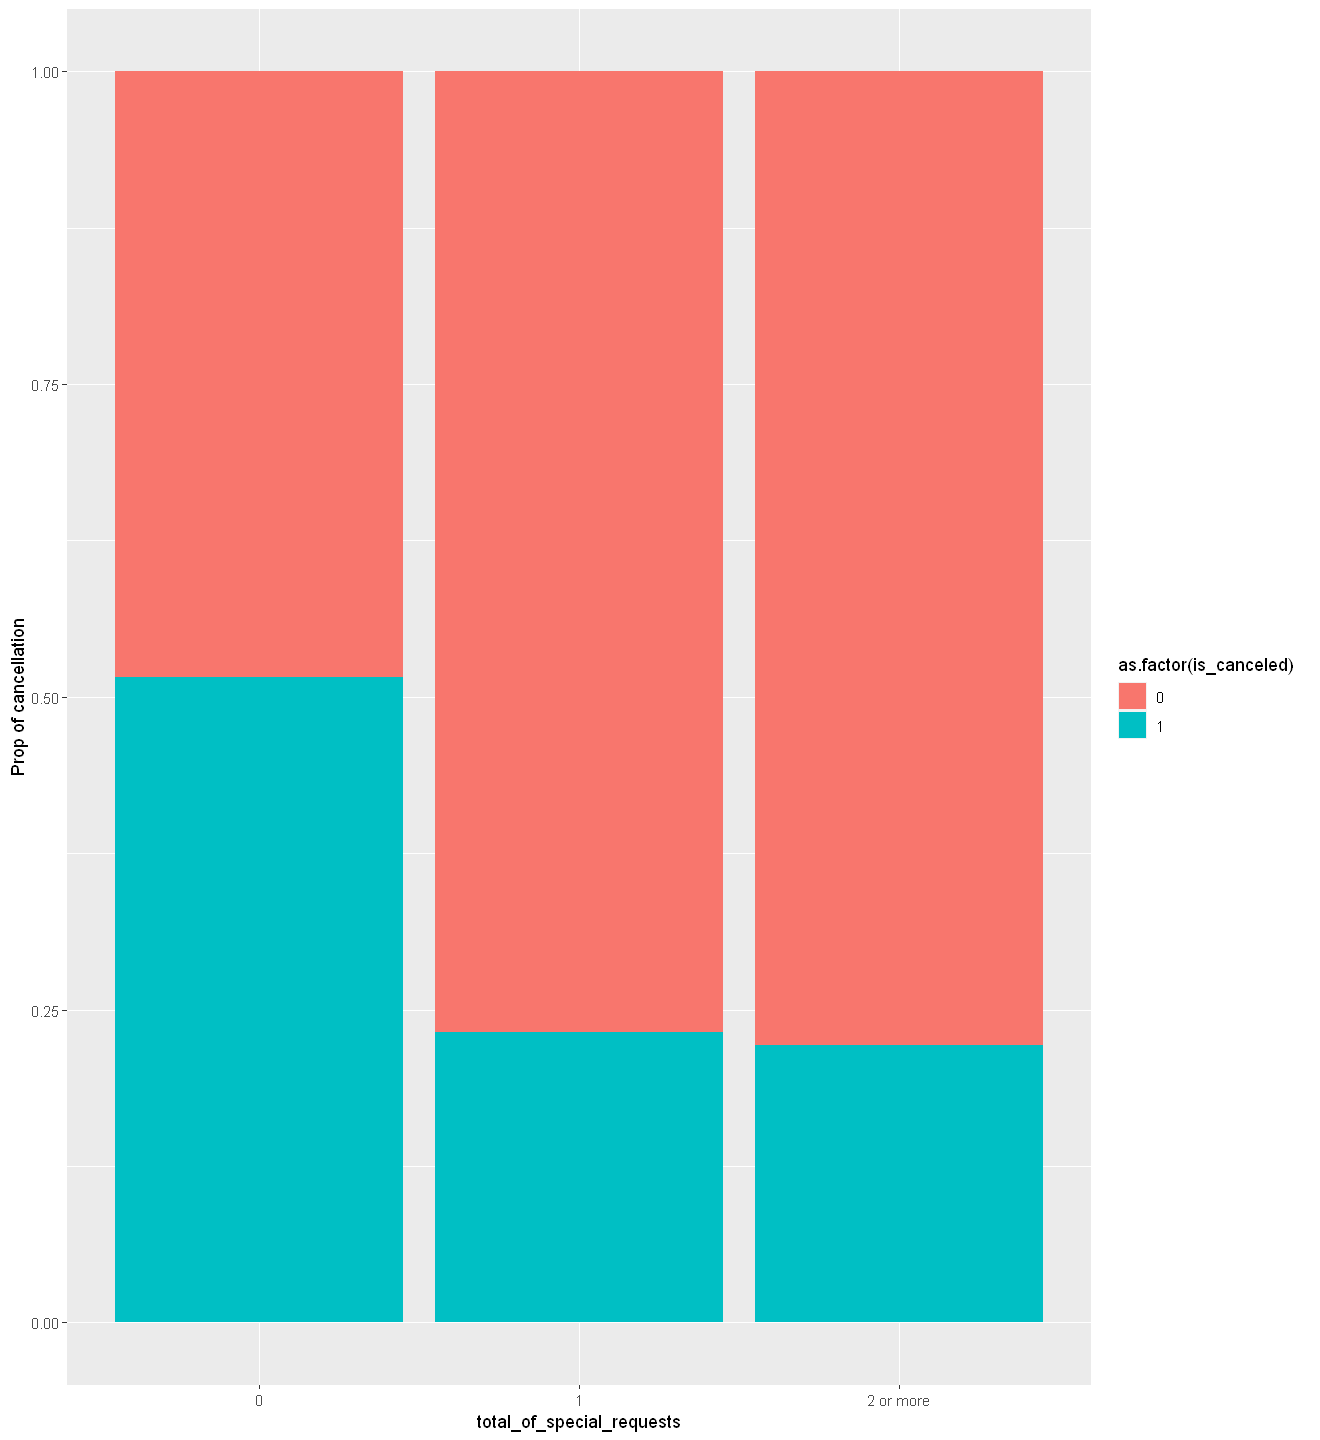

In [28]:
q2
table(data_ini$total_of_special_requests)
data_ini %>%group_by(total_of_special_requests,is_canceled)%>%count()

In [29]:
#设置分组， A组:previous_cancellations取值为 0， B组：previous_cancellations取值为'1 or more'
A_group <- data_ini%>%filter(total_of_special_requests =='1')
#A_group%>%summarise(mean = mean(is_canceled))
B_group <- data_ini%>%filter(total_of_special_requests == '2 or more')
#B_group%>%summarise(mean = mean(is_canceled))
A_group <- A_group%>%mutate(group = 'A')
B_group <- B_group%>%mutate(group = 'B')
#分别A组和B组随机抽取5000个样本
sample_A <- sample_n(A_group,size = 5000)
sample_B <- sample_n(B_group,size = 5000)
sample_data <- rbind(sample_A,sample_B)
sample_data %>%group_by(group,is_canceled)%>%count()
sample_data %>%group_by(group)%>%summarise(mean = mean(is_canceled))


# install.packages ("pwr")
library (pwr)
# ######## 2-sample test for equality of proportions ############
# H0: Group A - Group B  <= 0.62
# H1: Group A - Group B > 0.62
prop.test(c(1181, 1119), c(5000, 5000))

p1 <- 1181/5000
p2 <- 1119/5000
n1 <- 5000
n2 <- 5000
C <- 0

#print(z)
SE <- sqrt((p1*(1-p1)/n1 + p2*(1-p2)/n2))

z = ((p1 - p2) - C)/SE
print(paste0("Z:",z))
(1 - pnorm(abs(z),lower.tail = TRUE)) 
#P值为0.1472，因此我们无法拒绝原假设，当total_of_special_requests取值为1或者'2or more'时，两者的取消率没有显著性差异。


group,is_canceled,n
<chr>,<dbl>,<int>
A,0,3850
A,1,1150
B,0,3907
B,1,1093


group,mean
<chr>,<dbl>
A,0.2300
B,0.2186



	2-sample test for equality of proportions with continuity correction

data:  c(1181, 1119) out of c(5000, 5000)
X-squared = 2.1011, df = 1, p-value = 0.1472
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.004294541  0.029094541
sample estimates:
prop 1 prop 2 
0.2362 0.2238 


[1] "Z:1.47343012975136"


[1] 0.07031755

### 2、功效检验
由上面结果发现P值为0.1472，这说明两种情况，①要么这两个取值带来的取消率的确没有差异，②要么上述实验的功效不够大，也即样本来不够大从而导致实验犯了二类错误，使得当原假设为假的时候，我们没有做出正确的选择反而接受了原假设。
因此我们考虑功效检验来检验以下上述实验的功效值，观察其功效是否足够大，由经验法则可得知，一般0.8为功效最常用取值，且功效取值越大，二类错误越小。            
由结果可得，功效高达99.88%，因此上述实验中功效足够大，不存在我们讲的第二种情况，所以当total_of_special_requests取值为1或者'2or more'时，两者的取消率没有显著性差异的结论是正确的。

In [30]:
#我们假设效应规模为1%，n为设定的5000，α为0.05
pwr.2p.test(h= 0.1,n=5000,sig.level = 0.05)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.1
              n = 5000
      sig.level = 0.05
          power = 0.9988173
    alternative = two.sided

NOTE: same sample sizes


# 八、预测分析
接下来我们用训练出来的逻辑回归模型进行预测，整个过程使用 `mlr` package
`mlr` package 建立模型以及做预测的框架如下：
* 1. Define the task.
* 2. Define the learner.
* 3. Train the model.
* 4. Make prediction using hold out CV and 5 folds CV
* 5. Result interpretation

### 1、这里我们使用含有全部特征的数据集进行训练测试模型

In [640]:
#1 Define two classification tasks just for camparasion of results 

## One task used with  hold-out CV
 
data_modeltrs$is_canceled <- as.factor(data_modeltrs$is_canceled)

train.task <- makeClassifTask(data = train,
                              target = 'is_canceled')

## Another task used with 5 folds CV. 
### why 5 folds CV→ Return more stable results and prevent overfitting.
task_10fold <- makeClassifTask(data = data_modeltrs,
                               target = 'is_canceled')
#2 Define a logistic regression learner
logReg <- makeLearner('classif.logreg',predict.type = "prob")

#3 Train our model
logRegModel <- train(logReg,train.task)

#4 make predition
logpre <- predict(logRegModel, newdata = test)

logpre
# evaluate performance 

print('Result of Hold-out CV ')
performance(logpre,measures =list(mmce,acc,auc,f1,fpr,fnr))

#confusion matrix
calculateConfusionMatrix(logpre, relative = TRUE)

#5-folds cross validation 
kFold <- makeResampleDesc(method = 'RepCV', folds =5, stratify = TRUE)
kFoldCV <- resample(learner = logReg,
                   task = task_10fold,
                   resampling = kFold , measures = list(mmce,acc,auc,f1,fpr,fnr))
print('Result of 5-folds CV for 50 times')
kFoldCV$aggr


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Prediction: 30869 observations
predict.type: prob
threshold: 0=0.50,1=0.50
time: 0.03
   truth    prob.0       prob.1 response
6      0 0.6449950 3.550050e-01        0
12     0 0.8795590 1.204410e-01        0
14     0 0.9999999 9.785704e-08        0
15     1 0.2117138 7.882862e-01        1
16     0 1.0000000 2.884760e-08        0
17     1 0.2081260 7.918740e-01        1
... (#rows: 30869, #cols: 4)

[1] "Result of Hold-out CV "


mmce        acc        auc         f1        fpr        fnr 
0.20078396 0.79921604 0.86614216 0.84911632 0.39560348 0.07749273

Relative confusion matrix (normalized by row/column):
        predicted
true     0         1         -err.-   
  0      0.92/0.79 0.08/0.17 0.08     
  1      0.40/0.21 0.60/0.83 0.40     
  -err.-      0.21      0.17 0.20     


Absolute confusion matrix:
        predicted
true         0    1 -err.-
  0      17440 1465   1465
  1       4733 7231   4733
  -err.-  4733 1465   6198

Resampling: repeated cross-validation

Measures:             mmce      acc       auc       f1        fpr       fnr       

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
[Resample] iter 1:    0.2052578 0.7947422 0.8649198 0.8457719 0.4057520 0.0769108 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
[Resample] iter 2:    0.2035669 0.7964331 0.8631406 0.8467196 0.4000249 0.0777937 

[Resample] iter 3:    0.2024295 0.7975705 0.8646776 0.8475221 0.3979833 0.0772296 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
[Resample] iter 4:    0.1972009 0.8027991 0.8693151 0.8508637 0.3844622 0.0773155 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
[Resample] iter 5:    0.1999125 0.8000875 0.8637780 0.8490164 0.3901892 0.0781063 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
[Resample] iter 6:    0.2038000 0.7962000 0.8642496 0.8464299 0.3990289 

[1] "Result of 5-folds CV for 50 times"


mmce.test.mean  acc.test.mean  auc.test.mean   f1.test.mean  fpr.test.mean 
    0.20191554     0.79808446     0.86509432     0.84779105     0.39596866 
 fnr.test.mean 
    0.07768481

### 2、这里我们尝试只使用仅涵盖前十个重要特征的数据集来训练测试模型，以此来对比结果
可发现，使用全部特征训练模型测试出来的结果更优，因此我们采纳由全部特征跑出来的模型结果

In [639]:
#1 Define two classification tasks just for camparasion of results 

## One task used with  hold-out CV
 
data_modeltrs$is_canceled <- as.factor(data_modeltrs$is_canceled)

train.task <- makeClassifTask(data = train[top_10],
                              target = 'is_canceled')

## Another task used with 5 folds CV. 
### why 5 folds CV→ Return more stable results and prevent overfitting.
task_10fold <- makeClassifTask(data = data_modeltrs[top_10],
                               target = 'is_canceled')
#2 Define a logistic regression learner
logReg <- makeLearner('classif.logreg',predict.type = "prob")

#3 Train our model
logRegModel <- train(logReg,train.task)
#4 make predition
logpre <- predict(logRegModel, newdata = test)

logpre
# evaluate performance 

print('Result of Hold-out CV ')
performance(logpre,measures =list(mmce,acc,auc,f1,fpr,fnr))

#confusion matrix
calculateConfusionMatrix(logpre, relative = TRUE)

#5-folds cross validation 
kFold <- makeResampleDesc(method = 'RepCV', folds =5, stratify = TRUE)
kFoldCV <- resample(learner = logReg,
                   task = task_10fold,
                   resampling = kFold , measures = list(mmce,acc,auc,f1,fpr,fnr))
print('Result of 5-folds CV for 50 times')
kFoldCV$aggr


Prediction: 30869 observations
predict.type: prob
threshold: 0=0.50,1=0.50
time: 0.45
   truth    prob.0       prob.1 response
6      0 0.8331322 1.668678e-01        0
12     0 0.8559015 1.440985e-01        0
14     0 1.0000000 1.202209e-08        0
15     1 0.4534259 5.465741e-01        1
16     0 1.0000000 1.242653e-08        0
17     1 0.4578148 5.421852e-01        1
... (#rows: 30869, #cols: 4)

[1] "Result of Hold-out CV "


mmce       acc       auc        f1       fpr       fnr 
0.2325958 0.7674042 0.8160949 0.8191436 0.3790538 0.1399101

Relative confusion matrix (normalized by row/column):
        predicted
true     0         1         -err.-   
  0      0.86/0.78 0.14/0.26 0.14     
  1      0.38/0.22 0.62/0.74 0.38     
  -err.-      0.22      0.26 0.23     


Absolute confusion matrix:
        predicted
true         0    1 -err.-
  0      16260 2645   2645
  1       4535 7429   4535
  -err.-  4535 2645   7180

Resampling: repeated cross-validation

Measures:             mmce      acc       auc       f1        fpr       fnr       

[Resample] iter 1:    0.2366490 0.7633510 0.8148835 0.8154184 0.3834661 0.1426636 

[Resample] iter 2:    0.2346939 0.7653061 0.8137089 0.8166705 0.3785634 0.1425839 

[Resample] iter 3:    0.2287394 0.7712606 0.8219664 0.8211830 0.3696464 0.1385302 

[Resample] iter 4:    0.2339764 0.7660236 0.8110905 0.8176067 0.3809761 0.1398741 

[Resample] iter 5:    0.2326757 0.7673243 0.8163605 0.8190476 0.3832171 0.1362984 

[Resample] iter 6:    0.2385441 0.7614559 0.8155006 0.8130403 0.3779880 0.1492787 

[Resample] iter 7:    0.2321411 0.7678589 0.8145626 0.8184548 0.3733815 0.1417185 

[Resample] iter 8:    0.2295544 0.7704456 0.8197292 0.8212367 0.3769920 0.1351718 

[Resample] iter 9:    0.2324214 0.7675786 0.8154978 0.8189561 0.3803062 0.1377331 

[Resample] iter 10:   0.2340736 0.7659264 0.8118853 0.8182058 0.3872012 0.1360485 

[Resample] iter 11:   0.2366119 0.763

[1] "Result of 5-folds CV for 50 times"


mmce.test.mean  acc.test.mean  auc.test.mean   f1.test.mean  fpr.test.mean 
     0.2333469      0.7666531      0.8155608      0.8179845      0.3791738 
 fnr.test.mean 
     0.1399901

### 结果:
* 结果表明交叉验证返回的结果跟hold-out验证返回的结果相似
* 对于50次5折交叉验证，准确率为79.81%，对于Hold-out CV ,准确率为79.92%

* 二类错误大概为7.7%，一类错误为39.5%左右，本项目中我们更注重二类错误，因为对于酒店经营来说，犯二类错误成本更高，也即酒店可能会损失潜在利润，因为酒店会错误地将“不好的用户”误认为“好的用户”，所以酒店在整个预定到确认入住的期间会一直为这些“不好的用户”保留客房，然而这些用户到时候并不会来入住而是会取消订单，这对那些真正有入住需求的用户无法入住。



[1] "Result of Hold-out CV"         
mmce  0.2008                
acc  0.7992         
auc  0.8661       
f1  0.8491            
fpr 0.3956            
fnr 0.0774           
             
[2] "Result of 10-folds CV for 50 times"             
mmce.test.mean 0.2019              
acc.test.mean  0.7981              
auc.test.mean  0.8651               
f1.test.mean   0.8478               
fpr.test.mean  0.3960             
fnr.test.mean  0.0777         

# 九、总结
   到此为止，我们整个项目就结束了，整个过程我们做了数据清洗，特征工程，数据探索性分析，建模分析，ABtest，以及模型评估等步骤。对于数据清洗，我们对缺失值、异常值做了一系列处理；特征工程则包含了特征筛选，特征构建，特征筛选是通过随机森林特征重要性实现并从中选出前十个较为重要的，其中最重要的特征是用户之前有没有取消过订单，紧接着我们根据前十个较为重要的特征结合目标变量做了数据探索性分析，对每个特征的取值分布与订单取消率进行一个初步探索。之后我们利用逻辑回归模型对这前十个重要特征进行建模分析，并借助似然比检验检测了其中`required_car_parking_spaces1`的重要性，似然比检验给我们证明了尽管wald test 返回结果不显著，但这不一定正确。接着我们讨论了这前十个重要特征的边际效应，其中对于最重要的特征`previous_cancellations1.or.more`来说，在其他自变量不变情况下，每增加一单位previous_cancellations1.or.more，用户取消预定酒店订单的概率便增加65%。我们还进行了AB TEST，目的是为了检测特征`total_of_special_requests`的不同取值分别为1，以及"2 or more"时，返回的相似的取消率是否有差异，也就是不同取值是否一定会满足统计上的显著性差异，结合功效检验我们发现的确不存在差异，最后我们把覆盖所有特征的数据集重新建立逻辑回归模型并进行预测评估，得到的模型准确率接近80，AUC值为86.5%，F1为84.8%，虽然一类错误为39.6%，但二类错误为7.77%，这个结果还可以接受，因为这对于二类错误成本比较大的酒店经营行业来说，这个结果不会带来太大的损失。                 
   对于用户画像，我们要总结出了哪些用户倾向于取消预定订单，其具有的特征如下所示：以下的特征是利用随机森林根据特征重要性挑选出来的重要特征，括号里的百分比指的是结合`is_canceled`可视化统计出来的预订取消率。【注意：取消率百分比大小跟特征重要性排名之间不存在相关关系】          
①之前取消过预定酒店的订单（97%取消率）                    
②预定酒店没有提出特殊要求（51%）         
③预定不退还押金的酒店类型（几乎100%）  
④没有提出停车位的需求（39%）              
⑤当选择到达酒店入住的日期距离预定酒店订单的日期时间差超过五个半月（57%）             
⑥用户预定酒店订单后没有做出任何修改（40%）             
⑦通过ID为0-9的代理机构预定酒店（43.75%）                        

# 十、参考资料
* https://rpubs.com/JanpuHou/280223
* https://www.statmethods.net/stats/power.html
* https://mlr.mlr-org.com/articles/tutorial/filter_methods.html
* https://www.kaggle.com/jessemostipak/hotel-booking-demand